In [29]:
import numpy as np
%config InlineBackend.rc = {}
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.utils.data import download_file
from astropy.io import fits
from matplotlib.colors import LogNorm
from photutils import CircularAperture
from astropy import units as u
from photutils import aperture_photometry
from photutils import CircularAnnulus
from photutils import EllipticalAnnulus
from math import sin, cos, pi, asin, acos
from photutils import EllipticalAperture
import math

import plotly.plotly as py
import plotly.graph_objs as go

The velocities of each "a" and "b" galaxy (1-17) are stored in agalvel[ ] and bgalvel[ ], found from the Westoby paper 2007.


In [30]:
agalvel=[9289,7116,10339,9384,10850,10581,8564,12146,5338,1572,1687,1359,12721,11604,3003,7480,8263]
bgalvel=[9163,6735,10798,9163,10822,10338,8921,11934,5044,2231,2231,2231,12609,11934,3124,8437,8537]

The galactic velocities were one of the selection criteria for the matched sample, so the velocities of the "a" and "b" galaxy in each pair can be compared to see if the sample was well matched. 

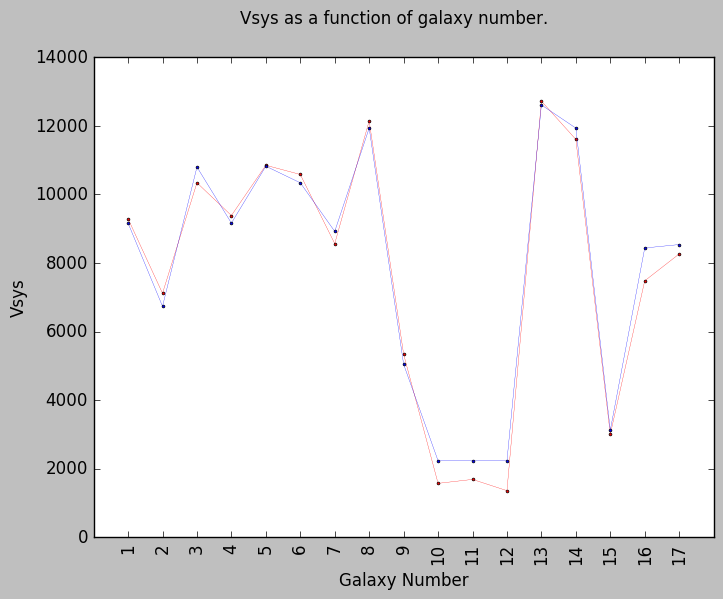

In [31]:
plt.figure(1)
y1 = agalvel
y2 = bgalvel
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y1, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y2, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Vsys as a function of galaxy number.')
plt.xlabel('Galaxy Number')
plt.ylabel('Vsys')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')

plt.show()

Inclinations of the galaxies are also given in the Westoby paper from 2007. Inclination was also a selection criteria for the matched sample so should be compared:

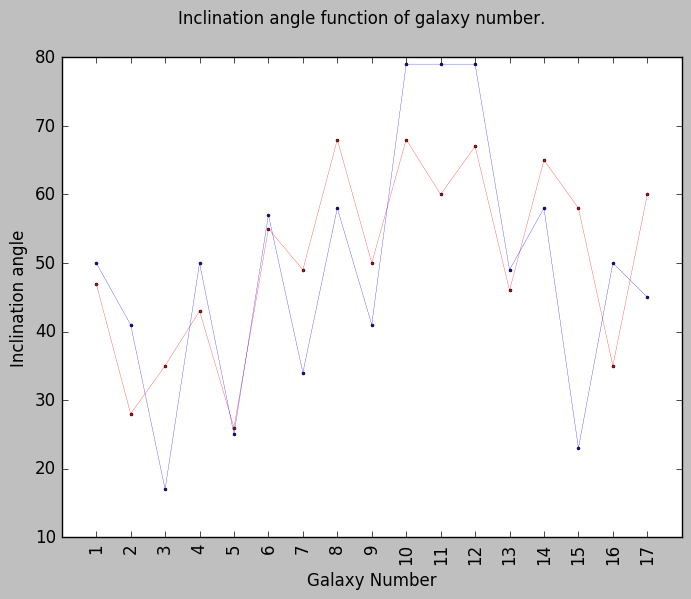

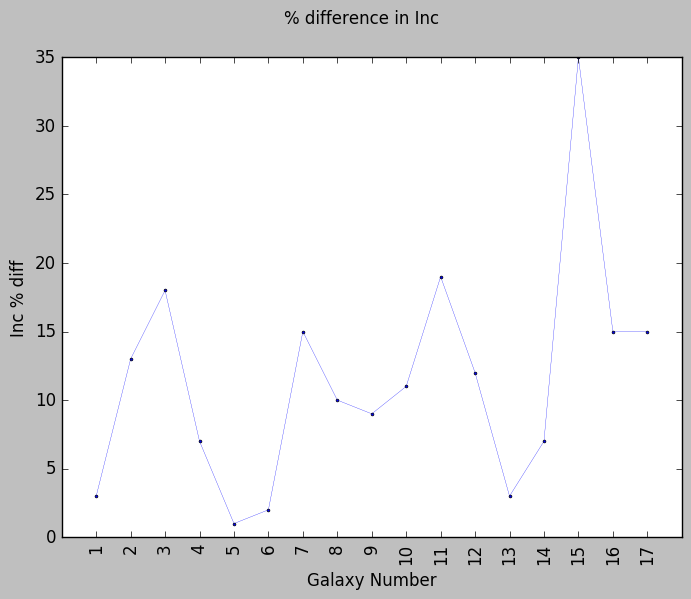

In [32]:
GalAInc=[47,28,35,43,26,55,49,68,50,68,60,67,46,65,58,35,60] #Checked
GalBInc=[50,41,17,50,25,57,34,58,41,79,79,79,49,58,23,50,45]

GalDiff=[]
for i in range(17):
    GalDiff.append(abs(GalAInc[i]-GalBInc[i]))

plt.figure(2)
y9 = GalAInc
y10 = GalBInc
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Inclination angle function of galaxy number.')
plt.xlabel('Galaxy Number')
plt.ylabel('Inclination angle')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()


plt.figure(3)
y = GalDiff
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('% difference in Inc')
plt.xlabel('Galaxy Number')
plt.ylabel('Inc % diff')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()


The background levels in each of the WISE images was found, and plotted in arrays to be used. The "A" demotes whether the array stores values for A or B galaxies and the 1/2/3/4 refers to the filter W1, W2, W3 or W4 used by the WISE mission.

The lower arrays are the value for the integrated total flux in the largest aperture for each galaxy divided by the number of individual pixels within the aperture. These are found for each of the 34 galaxies (17A and 17B galaxies) for each of the 4 bands.

In [33]:
#CHANGE ALL OF THESE ARRAYS


AFilterhBackgroundLevels=[218.49203852742292, 259.01835421291963, 265.85920623901058, 353.60375484720527, 335.45876669227033, 450.71593526789042, 434.08640791600175, 361.06281684282771, 313.72656101700056, 355.78135016884579, 231.35378810194675, 605.16820225267918, 210.49018897173099, 276.86495396266537, 249.38753420400653, 543.52445426601855, 568.23006091289358]
AFilterjBackgroundLevels=[62.803380253387225, 65.403410455494651, 76.626171420764237, 79.52353645132375, 80.923884936153769, 106.88234572985918, 109.92546589067376, 98.151782317395913, 99.505675344809276, 86.722794108237025, 75.658715602172933, 144.90678732690264, 74.255557665968638, 69.556560198352855, 53.357946928326186, 149.51599894334913, 124.91046723270203]
AFilterkBackgroundLevels=[319.29435351781882, 460.69680081287987, 411.85393316346182, 549.37318883352498, 451.33447396634978, 583.62228802200332, 486.7531866233287, 553.87947238872391, 599.36727935652868, 460.51508630994022, 554.96891767386364, 721.81350348232479, 654.18562797628306, 464.86660842096956, 609.73032096761278, 526.60467679458509, 477.16778147232429]
BFilterhBackgroundLevels=[344.8864397172261, 416.04951154682578, 282.57089643653484, 344.8864397172261, 440.33574343228435, 325.14451532928211, 427.2130740977463, 306.07618858654683, 382.83700368341272, 326.49957028412689, 326.49957028412689, 326.49957028412689, 300.38584622702757, 306.07618858654683, 515.16287796538904, 552.90124272250114, 657.89703857026325]
BFilterjBackgroundLevels=[94.002345851917866, 97.688347928612501, 97.378003784801237, 94.002345851917866, 104.67994899056231, 86.296744209051553, 109.43968720073877, 80.253178524502033, 113.6213944241979, 89.445772582644722, 89.445772582644722, 89.445772582644722, 88.163370645810119, 80.253178524502033, 147.34952619979893, 140.90715342373286, 187.38563209633205]
BFilterkBackgroundLevels=[581.51470150867169, 509.6227353288682, 560.38371258875566, 581.51470150867169, 408.66438745622253, 535.15533581143575, 616.76426612142563, 449.78033173281761, 614.82566075589682, 449.83405877992271, 449.83405877992271, 449.83405877992271, 591.61426205938142, 449.78033173281761, 205.16942301313347, 635.13021177045528, 657.05683390876004]

AFilter1BackgroundLevels=[3.937554719597101, 10.737180700276529, 7.9430901397987146, 4.0453830675561484, 4.4049390709951002, 5.044625871148356, 4.6036295418782949, 3.8884508830423128, 7.2936647291017316, 8.9530196183247934, 6.1541405857000768, 7.7398530526391873, 3.988828184061274, 4.1736991411510536, 11.661520404265326, 13.393636707243081, 4.3778245498365713]
AFilter2BackgroundLevels=[9.3271579662619288, 11.813684118468887, 11.763607587974054, 9.0983976950270993, 9.5603547679310736, 9.7869608467750115, 9.5054621779223325, 9.2944879775604079, 12.455873392755111, 12.835151868238524, 11.506436808638309, 12.132142304758789, 10.499137820369908, 9.829013032659784, 11.00073997609355, 17.136120730405565, 10.263967769829865]
AFilter3BackgroundLevels=[609.51603908441496, 580.00056858014557, 545.22262313450756, 496.7866838013818, 561.33747820911628, 572.13915470739971, 561.5222404553615, 561.59769601068058, 725.42329524587228, 620.20991178795964, 630.25298073591398, 596.53857426598677, 587.28946845629878, 620.94000085673349, 432.36523967175401, 684.97031743524497, 668.0959485246791]
AFilter4BackgroundLevels=[189.70625801832804, 179.39864935615316, 156.81654012994846, 148.16605509755627, 171.38353402557118, 180.09986139233524, 176.15795080443303, 175.66541872911748, 245.38995666243255, 196.8529432382677, 203.53436524696826, 190.22064075622848, 189.42002329408012, 187.46541994137587, 121.3314379465273, 208.6586027861091, 214.07795064134294]
BFilter1BackgroundLevels=[8.4546550104596019, 5.5550027157809865, 5.8438139845172321, 8.4546550104596019, 4.0366236641841065, 6.0521143019354193, 5.098936324364316, 5.326552105579073, 7.5514427832932585, 7.2820615488553635, 7.2820615488553635, 7.2820615488553635, 5.5703824965539646, 5.326552105579073, 9.869698859066462, 6.4430090488243259, 5.531897355354146]
BFilter2BackgroundLevels=[26.515784307048978, 11.716065607940195, 9.9755264996067456, 26.515784307048978, 9.5201277387433958, 19.18077139042704, 11.305698634545527, 11.530110142841403, 11.116955418945842, 11.727484112719726, 11.727484112719726, 11.727484112719726, 22.859934438491596, 11.530110142841403, 11.884542718064123, 11.336729776404502, 10.804030109167972]
BFilter3BackgroundLevels=[687.15516572561148, 765.64593169784996, 529.62452646954887, 687.15516572561148, 580.47707490681296, 870.38646408115198, 769.59947605737557, 838.65652108313327, 668.26680581698668, 810.53483328076902, 810.53483328076902, 810.53483328076902, 790.09239348918618, 838.65652108313327, 699.92967544012356, 573.1796999686502, 700.06504937989348]
BFilter4BackgroundLevels=[207.35932096990214, 245.15091774170537, 154.03360529904182, 207.35932096990214, 178.28438182916085, 287.8123962660103, 257.34063419399433, 282.43258757165029, 220.26669373516407, 270.3193137499415, 270.3193137499415, 270.3193137499415, 268.46770778049762, 282.43258757165029, 234.67034655290956, 183.3673220235282, 222.55965590783612]




AFilterhFluxPerPixelInLargestAperture=[3.4763061454456034e-08, 4.800451183464796e-08, 1.6770336616787193e-07, 4.5887467393369816e-08, 3.0243444283107816e-08, 1.0771163263399779e-07, 5.381404872969277e-08, 4.5635972321068504e-08, 9.062630503638003e-08, 7.767981806384891e-08, 4.2683794532844036e-08, 7.3536209698093e-08, 4.174525252540694e-08, 6.253523196585551e-08, 1.709914997857478e-07, 1.297047845361916e-07, 3.700984281879429e-08]
AFilterjFluxPerPixelInLargestAperture=[1.943334189030524e-08, 1.8504109477086857e-08, 8.966141622343264e-08, 2.1545500246543325e-08, 1.6856494636471602e-08, 5.4286547411605086e-08, 3.001643161331496e-08, 2.602202599381109e-08, 4.76504690431572e-08, 4.1835581016684154e-08, 2.106171799771445e-08, 3.6017684710663274e-08, 2.0852929731006906e-08, 3.176812370961724e-08, 6.887168339969247e-08, 5.8677387957792846e-08, 1.5706619606753497e-08]
AFilterkFluxPerPixelInLargestAperture=[4.296677121439705e-08, 9.077575756284509e-08, 2.3793724309927758e-07, 6.841011490673518e-08, 4.325791426967433e-08, 1.3585651077731218e-07, 6.782933634171583e-08, 7.165018681025869e-08, 1.0944755989874446e-07, 1.0066070553469356e-07, 5.180188445807189e-08, 9.271160546937153e-08, 6.8680248181968e-08, 7.374136205404559e-08, 1.9572100126611362e-07, 2.0921172689966016e-07, 4.5303648596035995e-08]
BFilterhFluxPerPixelInLargestAperture=[1.3026240764149701e-07, 8.42993773930248e-08, 1.2158000804088616e-07, 1.3026240764149701e-07, 3.569852911053194e-08, 5.288786276979177e-08, 4.1435391483152446e-08, 3.15203310836578e-08, 1.13954396844213e-07, 4.66388496377637e-08, 4.66388496377637e-08, 4.66388496377637e-08, 1.3402137625698606e-08, 3.15203310836578e-08, 1.8249224863328163e-07, 8.60943501515985e-08, 5.799351503606289e-08]
BFilterjFluxPerPixelInLargestAperture=[7.735696287549426e-08, 4.578632281211613e-08, 6.37340485127842e-08, 7.735696287549426e-08, 1.4632403407561024e-08, 2.693165032430513e-08, 1.8010047261053727e-08, 1.6464957854353173e-08, 5.328918499951773e-08, 2.6116139294207264e-08, 2.6116139294207264e-08, 2.6116139294207264e-08, 1.0526129360572844e-10, 1.6464957854353173e-08, 9.940203293570295e-08, 4.253993839291873e-08, 3.603245765057661e-08]
BFilterkFluxPerPixelInLargestAperture=[1.488194856206364e-07, 1.198617191593691e-07, 1.8077744247298129e-07, 1.488194856206364e-07, 4.2220139173502726e-08, 7.249620842691689e-08, 3.592014800342965e-08, 4.312365464042155e-08, 1.397427020670333e-07, 5.877020343170677e-08, 5.877020343170677e-08, 5.877020343170677e-08, 3.233808792784394e-08, 4.312365464042155e-08, 2.0016521632375e-07, 1.1490279014211503e-07, 6.485793101213386e-08]

AFilter1FluxPerPixelInLargestAperture=[652191897.52782667, -2776652.3080097088, 7995509442.3076086, 1202014783.9435465, 1228215222.7220674, 1919965047.361253, 1293970190.3586063, 1034050010.9344858, 2267607015.771307, 3166058082.9157176, 2098813736.6461484, 2914294525.5410881, 950647739.46323895, 1608315088.3242822, 4602170779.800869, 8961012372.3507061, 881389625.54234624]
AFilter2FluxPerPixelInLargestAperture=[278484311.02036077, 13936947.230754212, 5311195428.6154194, 773457023.48047745, 707451810.02138436, 774753180.56320417, 696294699.45979846, 472130616.71512467, 944840280.96794879, 1366998431.4004512, 865898969.70491266, 1267354366.3775294, 519916720.12398165, 1045714181.4253936, 1875255413.0265007, 7985700492.0517664, 465915145.4000172]
AFilter3FluxPerPixelInLargestAperture=[152941387.53032973, -64849719.572864719, 6004947781.491333, 691821594.151896, 526888793.50655681, 140127539.73331559, 697708159.53394628, 316545952.55823416, 293607477.61744803, 1556718493.3892088, 397349543.61669856, 1161527629.5075958, 257477371.12477711, 1340550283.1608834, 858451218.13568318, 3517769326.0349588, 651356582.92333436]
AFilter4FluxPerPixelInLargestAperture=[339482451.49421352, -298586185.50889337, 3715453604.127162, 525940380.84912306, 474139836.25809216, 212236734.60594004, 872556354.10980475, 39323033.881455429, 34621718.864479803, 1454113323.898155, 473836833.09249926, 809061861.89240217, 411590247.32752776, 934643229.1477176, 432035519.65499979, 1151368176.7496302, 1015735536.0278091]
BFilter1FluxPerPixelInLargestAperture=[1761569628.4164612, 2685103264.9564705, 3525877538.6666279, 1761569628.4164612, 587422191.23405266, 1171591309.9551966, 1029415447.8466607, 790611997.14719141, 3026489797.314157, 2037306806.3555059, 2037306806.3555059, 2037306806.3555059, 6513788.7598147718, 790611997.14719141, 3396351316.8383079, 2139480927.1934593, 1514840680.8582809]
BFilter2FluxPerPixelInLargestAperture=[600640622.58365273, 1358950042.4413471, 1753921669.4153278, 600640622.58365273, 241728401.50924414, 455698279.36027443, 418819679.24889612, 346481417.24557424, 1207413352.5405104, 854260545.43856728, 854260545.43856728, 854260545.43856728, 4314588.3234856045, 346481417.24557424, 1309631956.8877776, 867364318.46110046, 582116782.35953307]
BFilter3FluxPerPixelInLargestAperture=[-85454929.675175905, 2872422745.4426174, 3345705643.3320112, -85454929.675175905, 11432800.017796654, 10499204.856302701, 156762721.03030327, 306635066.33718061, 49631756.103671789, 606383306.09766734, 606383306.09766734, 606383306.09766734, -113704302.88272552, 306635066.33718061, 101336119.13731229, 132089885.88457337, 141966300.76092345]
BFilter4FluxPerPixelInLargestAperture=[-312037500.70267963, 1525466386.3761854, 1129146443.7297993, -312037500.70267963, -298503703.06788224, -144119750.93121499, 407530613.1038143, 243049119.7966015, -291619001.94238591, 465569111.80690563, 465569111.80690563, 465569111.80690563, -452822260.46259737, 243049119.7966015, -47363847.730960838, 180419018.13671237, 498921149.84885228]


band=[1,2,3,4]


for i in range(0,17):
    AFilter1FluxPerPixelInLargestAperture[i]=AFilter1FluxPerPixelInLargestAperture[i]*10e-16
    AFilter2FluxPerPixelInLargestAperture[i]=AFilter1FluxPerPixelInLargestAperture[i]*10e-16
    AFilter3FluxPerPixelInLargestAperture[i]=AFilter1FluxPerPixelInLargestAperture[i]*10e-16
    AFilter4FluxPerPixelInLargestAperture[i]=AFilter1FluxPerPixelInLargestAperture[i]*10e-16
    BFilter1FluxPerPixelInLargestAperture[i]=AFilter1FluxPerPixelInLargestAperture[i]*10e-16
    BFilter2FluxPerPixelInLargestAperture[i]=AFilter1FluxPerPixelInLargestAperture[i]*10e-16
    BFilter3FluxPerPixelInLargestAperture[i]=AFilter1FluxPerPixelInLargestAperture[i]*10e-16
    BFilter4FluxPerPixelInLargestAperture[i]=AFilter1FluxPerPixelInLargestAperture[i]*10e-16


for i in range(0,17):
    if AFilterhFluxPerPixelInLargestAperture[i] < 0:
        AFilterhFluxPerPixelInLargestAperture[i] = 0
    if AFilterjFluxPerPixelInLargestAperture[i] < 0:
        AFilterjFluxPerPixelInLargestAperture[i] = 0
    if AFilterkFluxPerPixelInLargestAperture[i] < 0:
        AFilterkFluxPerPixelInLargestAperture[i] = 0
    if BFilterhFluxPerPixelInLargestAperture[i] < 0:
        BFilterhFluxPerPixelInLargestAperture[i] = 0
    if BFilterjFluxPerPixelInLargestAperture[i] < 0:
        BFilterjFluxPerPixelInLargestAperture[i] = 0
    if BFilterkFluxPerPixelInLargestAperture[i] < 0:
        BFilterkFluxPerPixelInLargestAperture[i] = 0
    
    
    if AFilter1FluxPerPixelInLargestAperture[i] < 0:
        AFilter1FluxPerPixelInLargestAperture[i] = 0
    if AFilter2FluxPerPixelInLargestAperture[i] < 0:
        AFilter2FluxPerPixelInLargestAperture[i] = 0
    if AFilter3FluxPerPixelInLargestAperture[i] < 0:
        AFilter3FluxPerPixelInLargestAperture[i] = 0
    if AFilter4FluxPerPixelInLargestAperture[i] < 0:
        AFilter4FluxPerPixelInLargestAperture[i] = 0
    if BFilter1FluxPerPixelInLargestAperture[i] < 0:
        BFilter1FluxPerPixelInLargestAperture[i] = 0
    if BFilter2FluxPerPixelInLargestAperture[i] < 0:
        BFilter2FluxPerPixelInLargestAperture[i] = 0
    if BFilter3FluxPerPixelInLargestAperture[i] < 0:
        BFilter3FluxPerPixelInLargestAperture[i] = 0
    if BFilter4FluxPerPixelInLargestAperture[i] < 0:
        BFilter4FluxPerPixelInLargestAperture[i] = 0
    


The Flux per pixel in largest aperture can then be plotted as a function of galaxy number to observe how the differences in the flux intensity between each galaxy in each pair, for each of the 4 bands W1,W2,W3,W4.

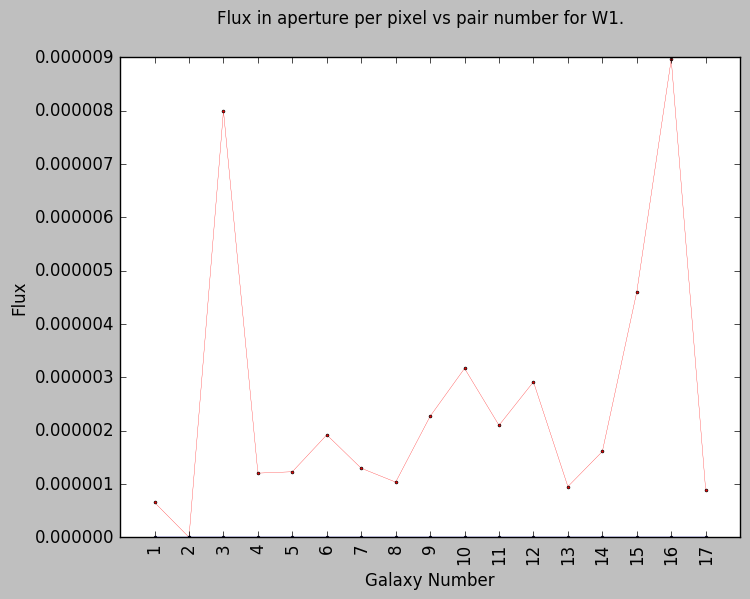

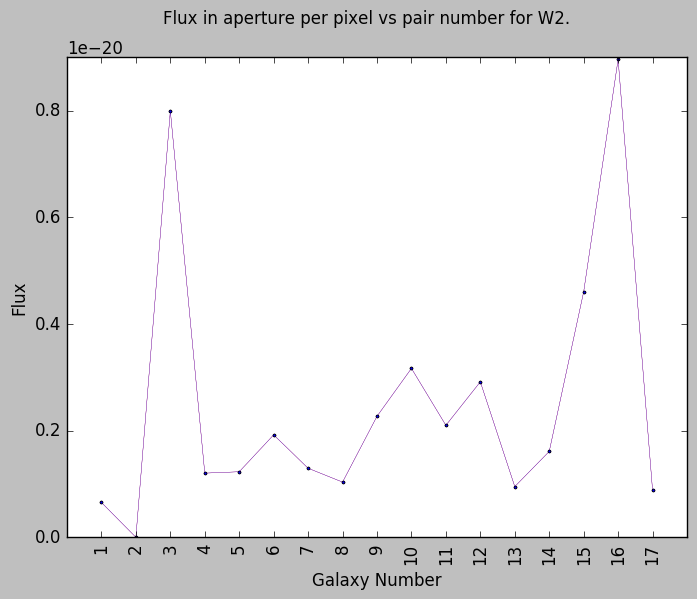

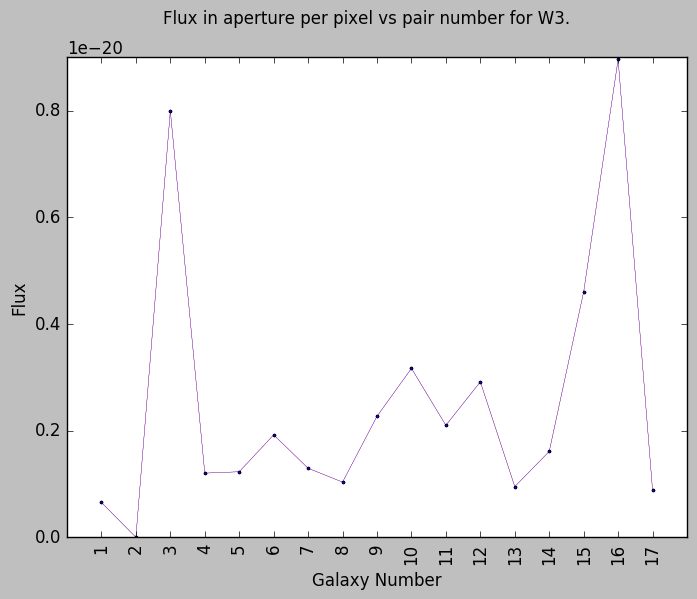

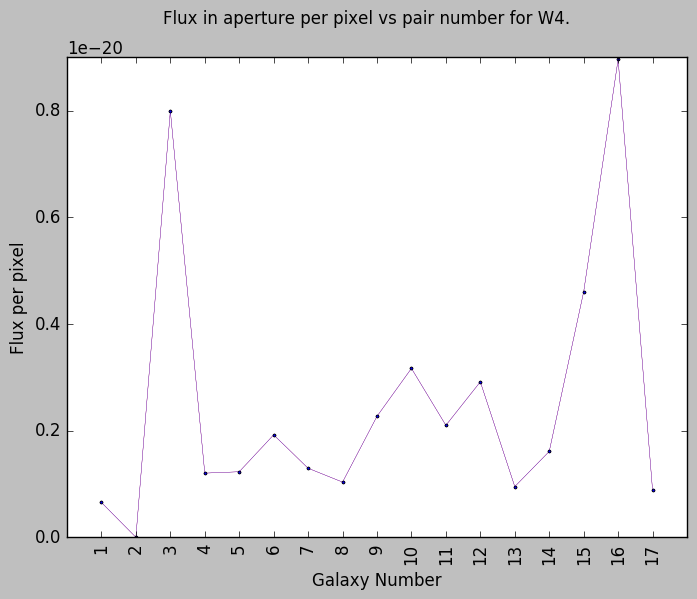

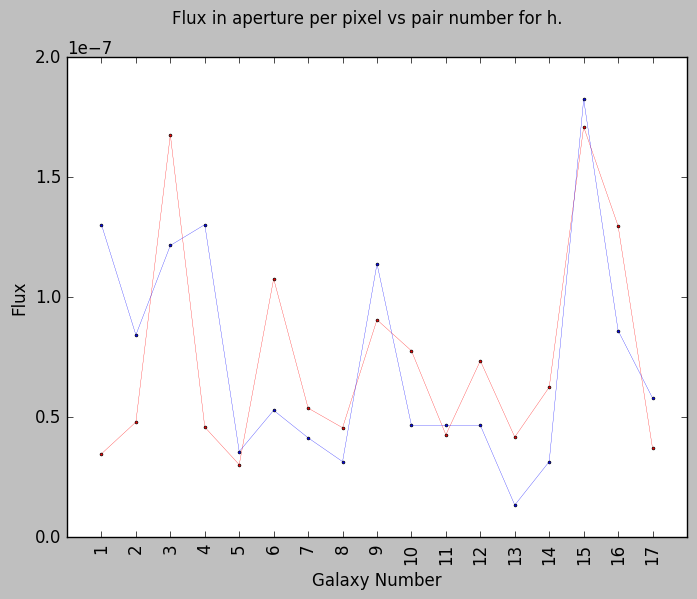

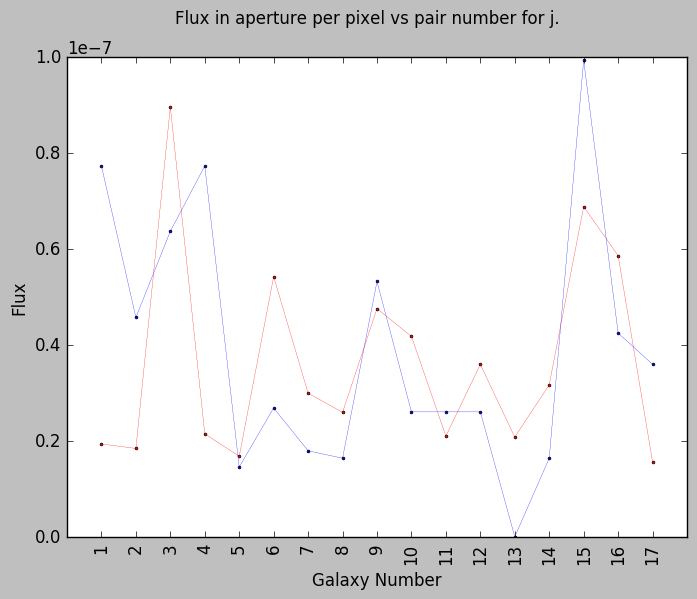

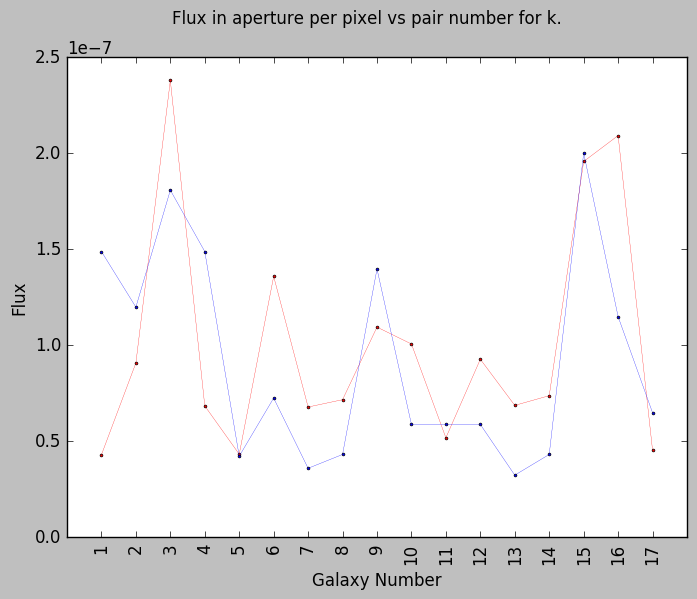

In [34]:
plt.figure(3)
y1 = AFilter1FluxPerPixelInLargestAperture
y2 = BFilter1FluxPerPixelInLargestAperture

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y1, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y2, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Flux in aperture per pixel vs pair number for W1.')
plt.xlabel('Galaxy Number')
plt.ylabel('Flux')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(4)
y3 = AFilter2FluxPerPixelInLargestAperture
y4 = BFilter2FluxPerPixelInLargestAperture

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y3, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y4, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Flux in aperture per pixel vs pair number for W2.')
plt.xlabel('Galaxy Number')
plt.ylabel('Flux')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(5)
y5 = AFilter3FluxPerPixelInLargestAperture
y6 = BFilter3FluxPerPixelInLargestAperture

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y5, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y6, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Flux in aperture per pixel vs pair number for W3.')
plt.xlabel('Galaxy Number')
plt.ylabel('Flux')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(6)
y7 = AFilter4FluxPerPixelInLargestAperture
y8 = BFilter4FluxPerPixelInLargestAperture

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y7, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y8, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Flux in aperture per pixel vs pair number for W4.')
plt.xlabel('Galaxy Number')
plt.ylabel('Flux per pixel')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(3)
y1 = AFilterhFluxPerPixelInLargestAperture
y2 = BFilterhFluxPerPixelInLargestAperture

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y1, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y2, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Flux in aperture per pixel vs pair number for h.')
plt.xlabel('Galaxy Number')
plt.ylabel('Flux')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(3)
y1 = AFilterjFluxPerPixelInLargestAperture
y2 = BFilterjFluxPerPixelInLargestAperture

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y1, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y2, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Flux in aperture per pixel vs pair number for j.')
plt.xlabel('Galaxy Number')
plt.ylabel('Flux')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(3)
y1 = AFilterkFluxPerPixelInLargestAperture
y2 = BFilterkFluxPerPixelInLargestAperture

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y1, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y2, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Flux in aperture per pixel vs pair number for k.')
plt.xlabel('Galaxy Number')
plt.ylabel('Flux')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

In [35]:
hAEffRadPolInt=[2.218430000006066, 2.1415600000055623, 2.4680700000077014, 1.77332000000315, 2.098910000005283, 1.694420000002633, 2.368760000007051, 1.7646100000030929, 2.7744700000097087, 3.254140000012851, 5.444059999963068, 2e-05, 2.128520000005477, 1.6210700000021525, 3.030490000011386, 2.7229800000093713, 3.3621000000135584]
hBEffRadPolInt=[1.574420000001847, 2.2922600000065496, 2.701070000009228, 1.574420000001847, 3.333060000013368, 2.368800000007051, 3.0058400000112244, 2.5213500000080504, 3.2108500000125675, 6.1653299999357625, 6.1653299999357625, 6.1653299999357625, 1.8179300000034422, 2.5213500000080504, 2.9288800000107202, 2.84185000001015, 2.4333100000074737]
jAEffRadPolInt=[2.1346900000055173, 1.8853400000038838, 2.5144500000080052, 1.8717200000037946, 2.2554600000063085, 1.7234800000028234, 2.4044000000072843, 1.8810200000038555, 2.8303000000100744, 3.4769000000143104, 5.494789999961148, 2e-05, 2.038030000004884, 1.6615700000024178, 3.0599300000115788, 2.8278300000100582, 2.9682700000109783]
jBEffRadPolInt=[1.574420000001847, 2.2922600000065496, 2.701070000009228, 1.574420000001847, 3.333060000013368, 2.368800000007051, 3.0058400000112244, 2.5213500000080504, 3.2108500000125675, 6.1653299999357625, 6.1653299999357625, 6.1653299999357625, 1.8179300000034422, 2.5213500000080504, 2.9288800000107202, 2.84185000001015, 2.4333100000074737]
kAEffRadPolInt=[2.039870000004896, 2.4688900000077068, 2.4746600000077446, 1.7644300000030917, 1.9760900000044783, 1.6205800000021493, 2.375670000007096, 1.8512600000036605, 2.5917200000085114, 3.1369700000120835, 5.381999999965418, 2e-05, 2.2628100000063567, 1.4240000000008615, 3.0653600000116143, 2.460700000007653, 3.2830900000130407]
kBEffRadPolInt=[1.574420000001847, 2.2922600000065496, 2.701070000009228, 1.574420000001847, 3.333060000013368, 2.368800000007051, 3.0058400000112244, 2.5213500000080504, 3.2108500000125675, 6.1653299999357625, 6.1653299999357625, 6.1653299999357625, 1.8179300000034422, 2.5213500000080504, 2.9288800000107202, 2.84185000001015, 2.4333100000074737]


W1AEffRadPolInt=[2.95326000001088, 1e-05, 3.301140000013159, 3.039230000011443, 3.5067000000145057, 2.687190000009137, 3.577890000014972, 2.581890000008447, 4.2584000000079545, 5.359009999966288, 9.87848999979519, 7.474829999886188, 3.364940000013577, 2.5219400000080543, 4.174380000011135, 3.42648000001398, 3.782460000016312]
W1BEffRadPolInt=[2.4124100000073367, 3.0670500000116254, 3.9211400000172207, 2.4124100000073367, 4.010900000017324, 2.9863500000110967, 4.2413600000086, 3.1131800000119276, 4.293150000006639, 8.49492999984757, 8.49492999984757, 8.49492999984757, 1.5987900000020066, 3.1131800000119276, 4.172750000011197, 4.171000000011263, 3.1539300000121946]
W2AEffRadPolInt=[3.1139600000119327, 2.7082300000092747, 3.4680600000142525, 3.223720000012652, 3.6451100000154124, 2.842600000010155, 3.629610000015311, 2.670280000009026, 4.430930000001423, 5.453269999962719, 9.95721999979221, 7.671049999878759, 3.480330000014333, 2.6206000000087006, 4.366240000003872, 3.530420000014661, 3.6866600000156846]
W2BEffRadPolInt=[2.516120000008016, 3.241580000012769, 4.0755300000148775, 2.516120000008016, 4.16765000001139, 3.119980000011972, 4.462220000000238, 3.258890000012882, 4.482839999999458, 8.68007999984056, 8.68007999984056, 8.68007999984056, 1.4793700000012242, 3.258890000012882, 4.347820000004569, 4.366930000003846, 3.2931000000131063]
W3AEffRadPolInt=[3.823020000016578, 1e-05, 4.024430000016812, 3.698940000015765, 4.223810000009264, 3.5219000000146052, 4.148500000012115, 2.872490000010351, 2e-05, 6.066579999939501, 12.052209999712899, 9.931769999793174, 4.523399999997922, 2.9862800000110963, 2e-05, 4.098800000013997, 2e-05]
W3BEffRadPolInt=[1e-05, 3.6666600000155536, 4.513519999998296, 1e-05, 1.102469999998755, 2e-05, 2e-05, 3.932490000017295, 1.0792199999986027, 10.56659999976914, 10.56659999976914, 10.56659999976914, 1e-05, 3.932490000017295, 2e-05, 2e-05, 4.306410000006137]
W4AEffRadPolInt=[4.15100000001202, 1e-05, 4.198110000010237, 4.335470000005037, 5.034499999978573, 5.12940999997498, 4.632369999993797, 0.2451500000001044, 2e-05, 6.286089999931191, 16.406559999548055, 9.500959999809483, 2e-05, 3.400050000013807, 2e-05, 3.734660000015999, 2e-05]
W4BEffRadPolInt=[1e-05, 2e-05, 2e-05, 1e-05, 1e-05, 1e-05, 2e-05, 4.842589999985838, 1e-05, 10.956449999754382, 10.956449999754382, 10.956449999754382, 1e-05, 4.842589999985838, 1e-05, 2e-05, 5.979299999942805]

GalAInc=[47,28,35,43,26,55,49,68,50,68,60,67,46,65,58,35,60] #Checked
GalBInc=[50,41,17,50,25,57,34,58,41,79,79,79,49,58,23,50,45]

factorA=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
factorB=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
agalradinc=[]
bgalradinc=[]

for i in range(0,17):
    agalradinc.append(GalAInc[i]*np.pi/180)
    i=i+1
for i in range(0,17):
    bgalradinc.append(GalBInc[i]*np.pi/180)
    i=i+1
        
for i in range(0,17):
    a=agalradinc[i]
    b=math.cos(a)
    factorA[i]=round(b,6)
    c=bgalradinc[i]
    d=math.cos(c)
    factorB[i]=round(d,6)
    i=i+1
#print("should be less than 1:", factorA)                          
#print("should be less than 1:", factorB)

hAMajEffRadPolInt=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
hBMajEffRadPolInt=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
jAMajEffRadPolInt=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
jBMajEffRadPolInt=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
kAMajEffRadPolInt=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
kBMajEffRadPolInt=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

W1AMajEffRadPolInt=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
W1BMajEffRadPolInt=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
W2AMajEffRadPolInt=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
W2BMajEffRadPolInt=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
W3AMajEffRadPolInt=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
W3BMajEffRadPolInt=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
W4AMajEffRadPolInt=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
W4BMajEffRadPolInt=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]


hAMajEffRadPolIntDist=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
hBMajEffRadPolIntDist=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
jAMajEffRadPolIntDist=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
jBMajEffRadPolIntDist=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
kAMajEffRadPolIntDist=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
kBMajEffRadPolIntDist=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

W1AMajEffRadPolIntDist=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
W1BMajEffRadPolIntDist=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
W2AMajEffRadPolIntDist=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
W2BMajEffRadPolIntDist=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
W3AMajEffRadPolIntDist=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
W3BMajEffRadPolIntDist=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
W4AMajEffRadPolIntDist=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
W4BMajEffRadPolIntDist=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]


for i in range(0,17):                    #Prints Major axis of the minor. Should be bigger than minor
    hAMajEffRadPolInt[i]=hAEffRadPolInt[i]/factorA[i]
    hBMajEffRadPolInt[i]=hBEffRadPolInt[i]/factorB[i]
    jAMajEffRadPolInt[i]=jAEffRadPolInt[i]/factorA[i]
    jBMajEffRadPolInt[i]=jBEffRadPolInt[i]/factorB[i]
    kAMajEffRadPolInt[i]=kAEffRadPolInt[i]/factorA[i]
    kBMajEffRadPolInt[i]=kBEffRadPolInt[i]/factorB[i]
    
    W1AMajEffRadPolInt[i]=W1AEffRadPolInt[i]/factorA[i]
    W1BMajEffRadPolInt[i]=W1BEffRadPolInt[i]/factorB[i]
    W2AMajEffRadPolInt[i]=W2AEffRadPolInt[i]/factorA[i]
    W2BMajEffRadPolInt[i]=W2BEffRadPolInt[i]/factorB[i]
    W3AMajEffRadPolInt[i]=W3AEffRadPolInt[i]/factorA[i]
    W3BMajEffRadPolInt[i]=W3BEffRadPolInt[i]/factorB[i]
    W4AMajEffRadPolInt[i]=W4AEffRadPolInt[i]/factorA[i]
    W4BMajEffRadPolInt[i]=W4BEffRadPolInt[i]/factorB[i]
    i=i+1
#print(W1AMajEffRadPolInt)

agalvel=[9289,7116,10339,9384,10850,10581,8564,12146,5338,1572,1687,1359,12721,11604,3003,7480,8263]
bgalvel=[9163,6735,10798,9163,10822,10338,8921,11934,5044,2231,2231,2231,12609,11934,3124,8437,8537]
GalAPetRad=[12.9,5.5,12.3,12.8,11.9,13.2,16.8,20.6,24.4,49.6,70.7,69.3,14.3,17.6,31.1,13.1,25.6]
GalBPetRad=[10.3,12.2,11.9,10.3,14.0,16.2,15.3,17.1,19.1,156.4,156.4,156.4,4.8,17.1,14.2,23.7,12.3]
GalAPetRadDist=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
GalBPetRadDist=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#Conversion from pixels to distance
for i in range(0,17):
    hAMajEffRadPolIntDist[i]=((agalvel[i]/(74.3))*(math.tan(hAMajEffRadPolInt[i]/3600*1.375*(np.pi/180))))*1000000   
    hBMajEffRadPolIntDist[i]=((bgalvel[i]/(74.3))*(math.tan(hBMajEffRadPolInt[i]/3600*1.375*(np.pi/180))))*1000000
    jAMajEffRadPolIntDist[i]=((agalvel[i]/(74.3))*(math.tan(jAMajEffRadPolInt[i]/3600*1.375*(np.pi/180))))*1000000
    jBMajEffRadPolIntDist[i]=((bgalvel[i]/(74.3))*(math.tan(jBMajEffRadPolInt[i]/3600*1.375*(np.pi/180))))*1000000
    kAMajEffRadPolIntDist[i]=((agalvel[i]/(74.3))*(math.tan(jAMajEffRadPolInt[i]/3600*1.375*(np.pi/180))))*1000000
    kBMajEffRadPolIntDist[i]=((bgalvel[i]/(74.3))*(math.tan(jBMajEffRadPolInt[i]/3600*1.375*(np.pi/180))))*1000000
        
    
    W1AMajEffRadPolIntDist[i]=((agalvel[i]/(74.3))*(math.tan(W1AMajEffRadPolInt[i]/3600*1.375*(np.pi/180))))*1000000   
    W1BMajEffRadPolIntDist[i]=((bgalvel[i]/(74.3))*(math.tan(W1BMajEffRadPolInt[i]/3600*1.375*(np.pi/180))))*1000000
    W2AMajEffRadPolIntDist[i]=((agalvel[i]/(74.3))*(math.tan(W2AMajEffRadPolInt[i]/3600*1.375*(np.pi/180))))*1000000
    W2BMajEffRadPolIntDist[i]=((bgalvel[i]/(74.3))*(math.tan(W2BMajEffRadPolInt[i]/3600*1.375*(np.pi/180))))*1000000
    W3AMajEffRadPolIntDist[i]=((agalvel[i]/(74.3))*(math.tan(W3AMajEffRadPolInt[i]/3600*1.375*(np.pi/180))))*1000000
    W3BMajEffRadPolIntDist[i]=((bgalvel[i]/(74.3))*(math.tan(W3BMajEffRadPolInt[i]/3600*1.375*(np.pi/180))))*1000000
    W4AMajEffRadPolIntDist[i]=((agalvel[i]/(74.3))*(math.tan(W4AMajEffRadPolInt[i]/3600*1.375*(np.pi/180))))*1000000
    W4BMajEffRadPolIntDist[i]=((bgalvel[i]/(74.3))*(math.tan(W4BMajEffRadPolInt[i]/3600*1.375*(np.pi/180))))*1000000
    
    
    GalAPetRadDist[i]=((agalvel[i]/(70))*(math.tan(GalAPetRad[i]/3600*1.375*(np.pi/180))))*1000000   
    GalBPetRadDist[i]=((bgalvel[i]/(70))*(math.tan(GalBPetRad[i]/3600*1.375*(np.pi/180))))*1000000   
  
    
    i=i+1








First Plot is Linearly interpolated
2nd plots is polynomially interpolated
3rd plots are polynomially interpolated with the effecive radii corrected to be the major axis not the minor. 
4th plots are 3rd converted to distances not pixels

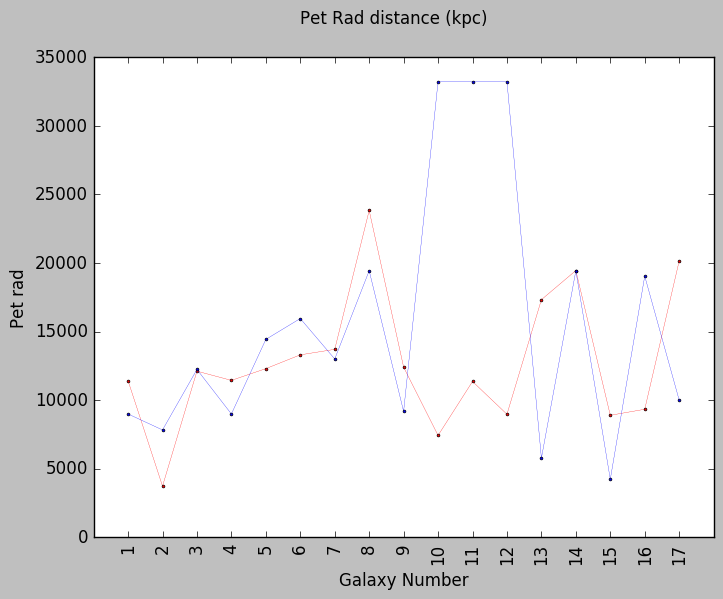

In [36]:
plt.figure(1)
y9 = GalAPetRadDist
y10 = GalBPetRadDist

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Pet Rad distance (kpc)')
plt.xlabel('Galaxy Number')
plt.ylabel('Pet rad')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

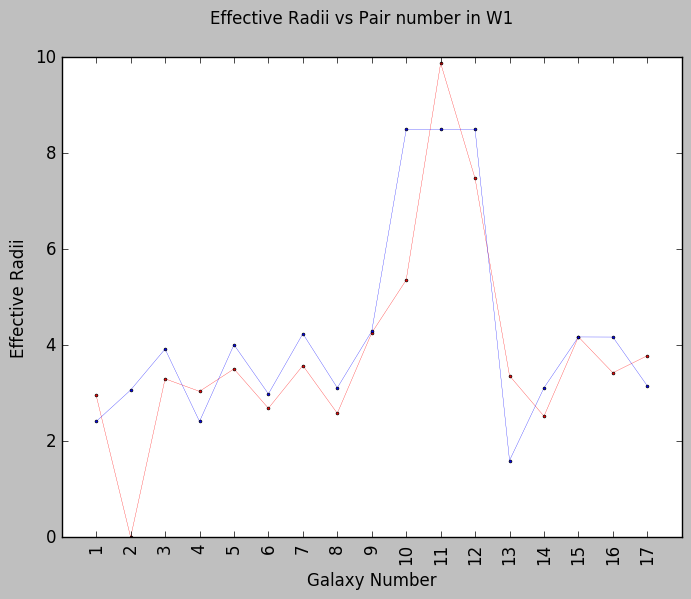

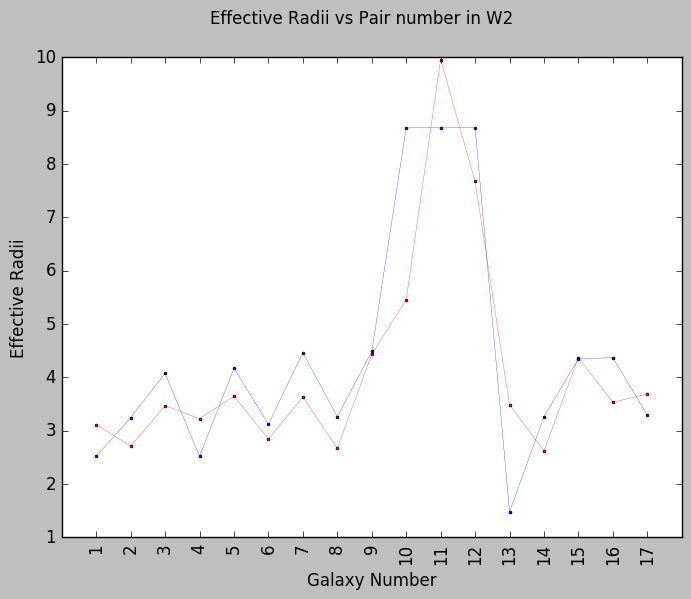

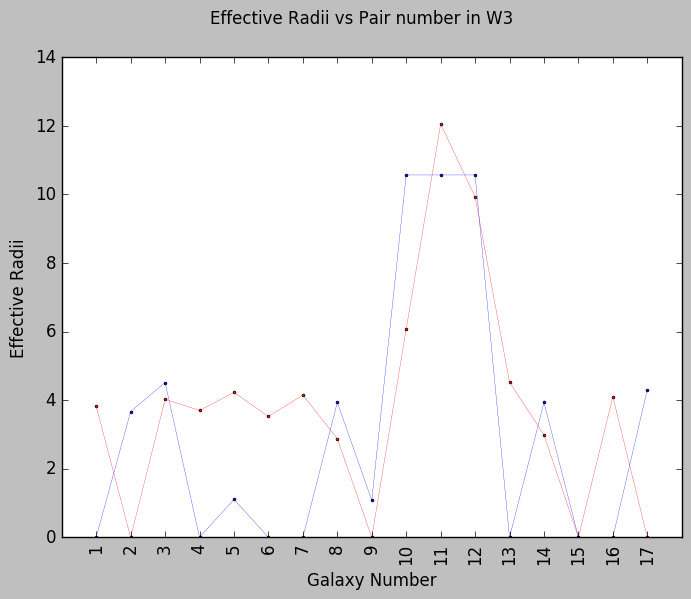

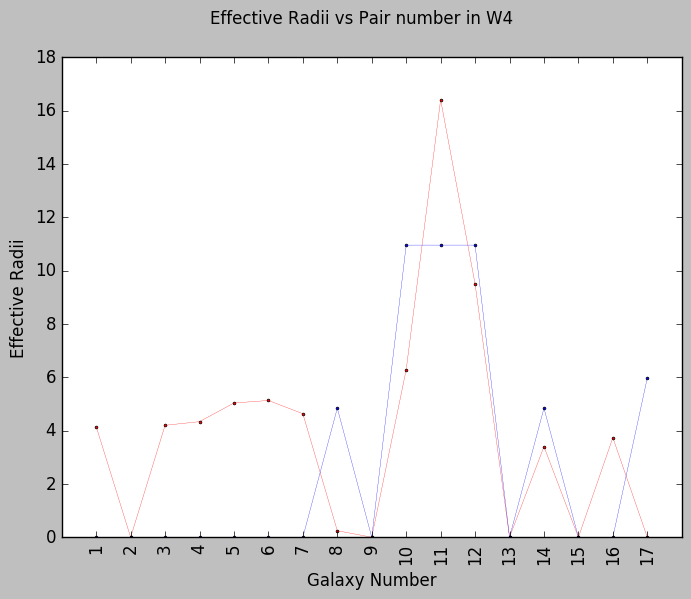

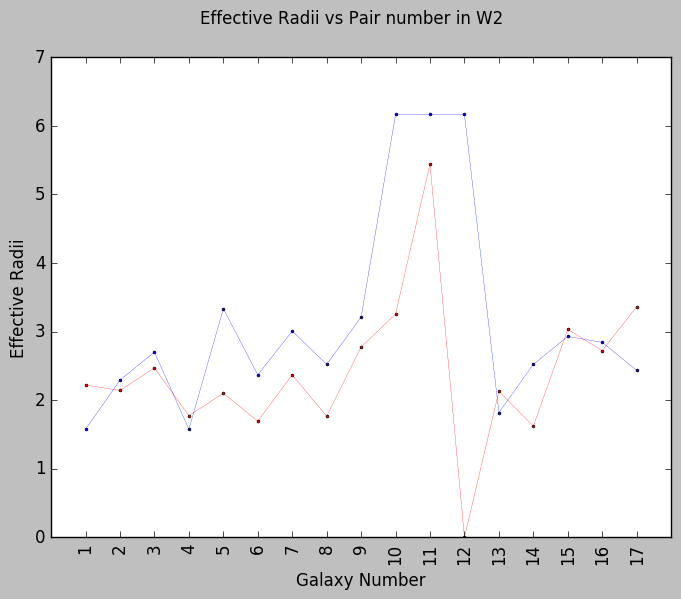

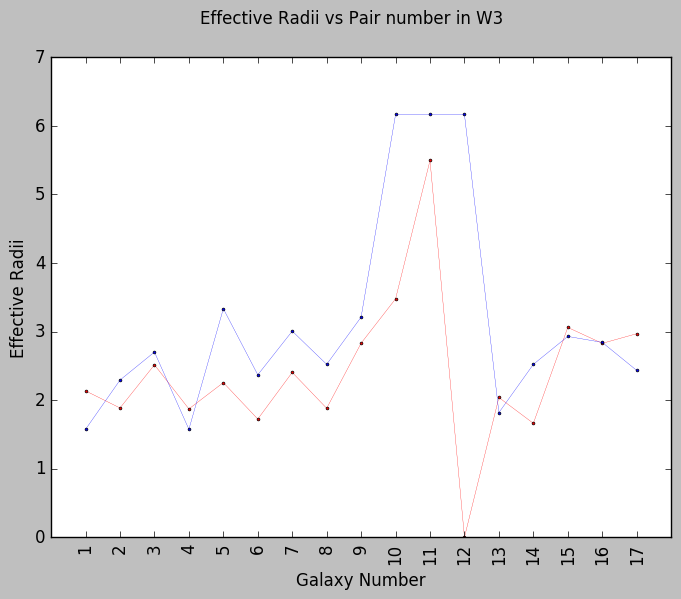

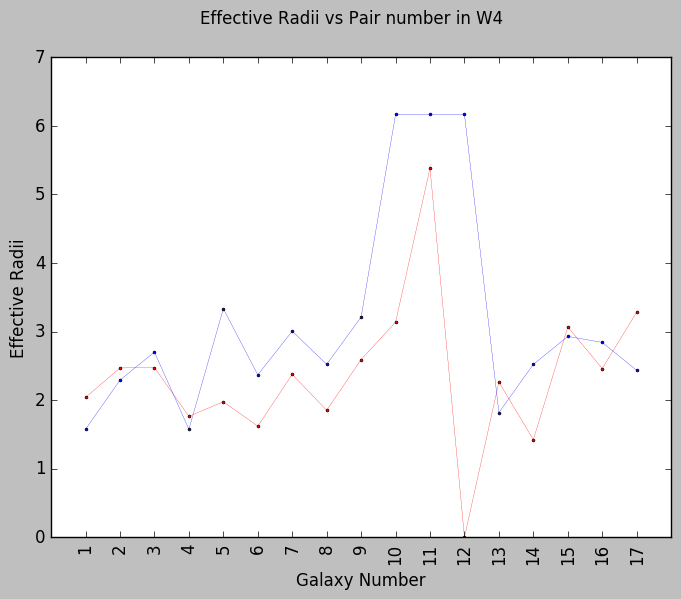

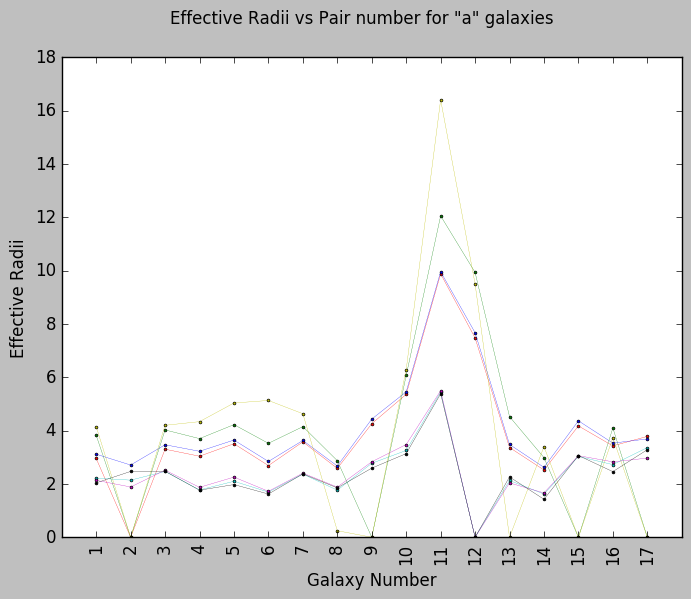

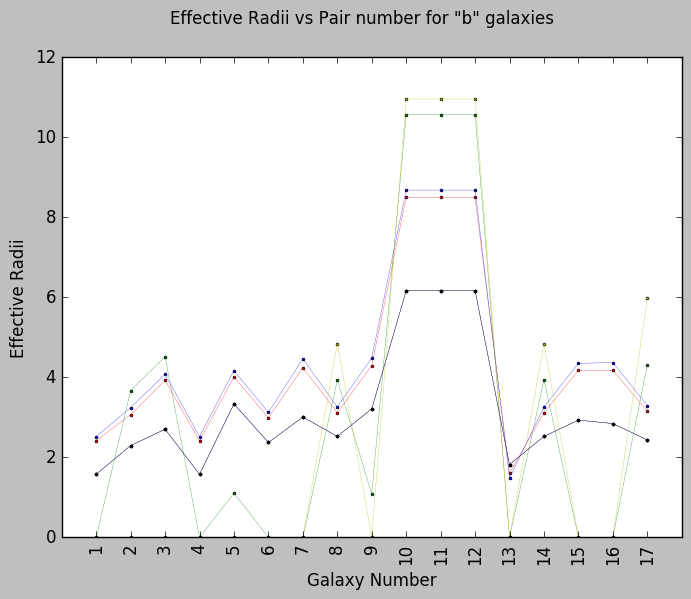

In [37]:
#Polynomially Interpolated effective radii Min Axis

plt.figure(7)
y9 = W1AEffRadPolInt
y10 = W1BEffRadPolInt

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number in W1')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(8)
y9 = W2AEffRadPolInt
y10 = W2BEffRadPolInt

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number in W2')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(8)
y9 = W3AEffRadPolInt
y10 = W3BEffRadPolInt

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number in W3')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(8)
y9 = W4AEffRadPolInt
y10 = W4BEffRadPolInt

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number in W4')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()


plt.figure(8)
y9 = hAEffRadPolInt
y10 = hBEffRadPolInt

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number in W2')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(8)
y9 = jAEffRadPolInt
y10 = jBEffRadPolInt

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number in W3')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(8)
y9 = kAEffRadPolInt
y10 = kBEffRadPolInt

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number in W4')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()











plt.figure(8)
y5 = hAEffRadPolInt
y6 = jAEffRadPolInt
y7 = kAEffRadPolInt

y1 = W1AEffRadPolInt
y2 = W2AEffRadPolInt
y3 = W3AEffRadPolInt
y4 = W4AEffRadPolInt

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y1, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y2, 'bo-', linewidth=0.2, ms=2)
line = plt.plot(x, y3, 'go-', linewidth=0.2, ms=2)
line = plt.plot(x, y4, 'yo-', linewidth=0.2, ms=2)
line = plt.plot(x, y5, 'co-', linewidth=0.2, ms=2)
line = plt.plot(x, y6, 'mo-', linewidth=0.2, ms=2)
line = plt.plot(x, y7, 'ko-', linewidth=0.2, ms=2)



plt.suptitle('Effective Radii vs Pair number for "a" galaxies')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(8)
y5 = hBEffRadPolInt
y6 = jBEffRadPolInt
y7 = kBEffRadPolInt


y1 = W1BEffRadPolInt
y2 = W2BEffRadPolInt
y3 = W3BEffRadPolInt
y4 = W4BEffRadPolInt


x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y1, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y2, 'bo-', linewidth=0.2, ms=2)
line = plt.plot(x, y3, 'go-', linewidth=0.2, ms=2)
line = plt.plot(x, y4, 'yo-', linewidth=0.2, ms=2)
line = plt.plot(x, y5, 'co-', linewidth=0.2, ms=2)
line = plt.plot(x, y6, 'mo-', linewidth=0.2, ms=2)
line = plt.plot(x, y7, 'ko-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number for "b" galaxies')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

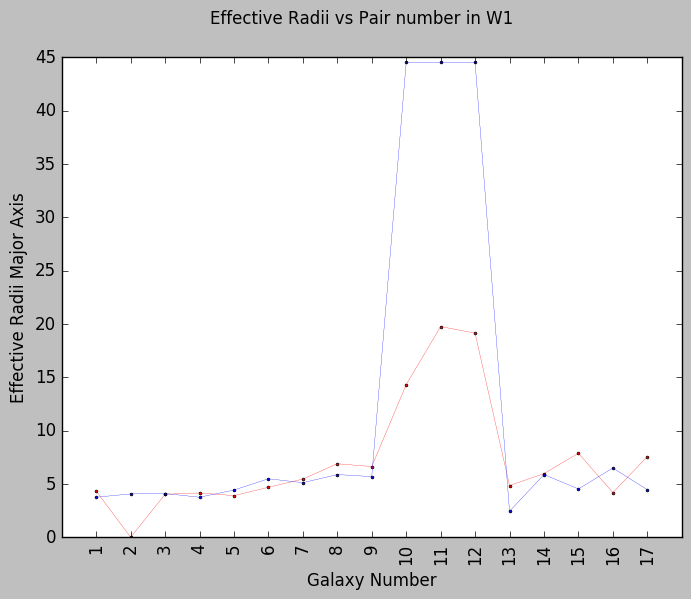

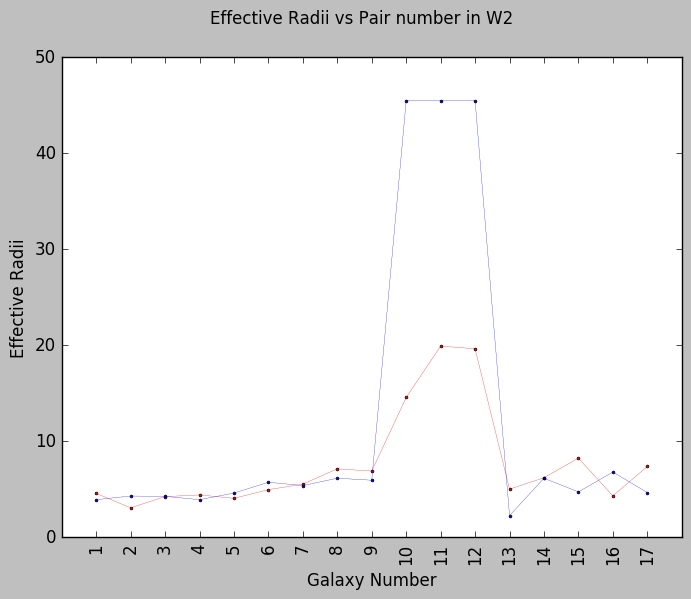

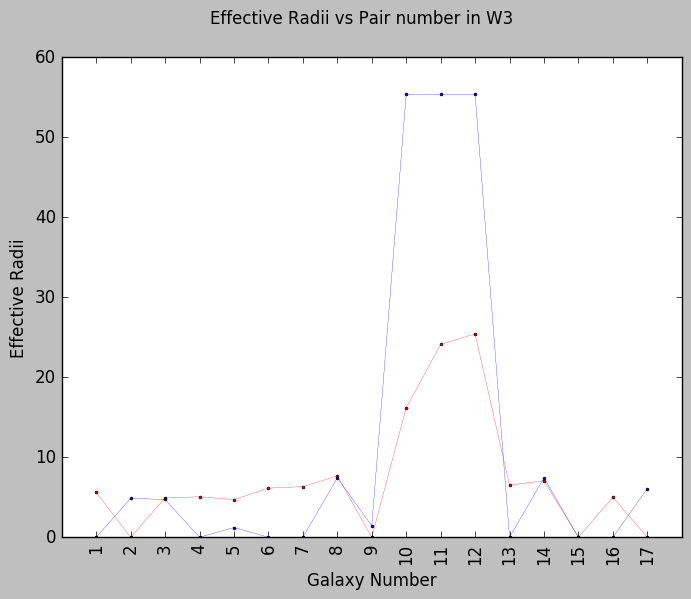

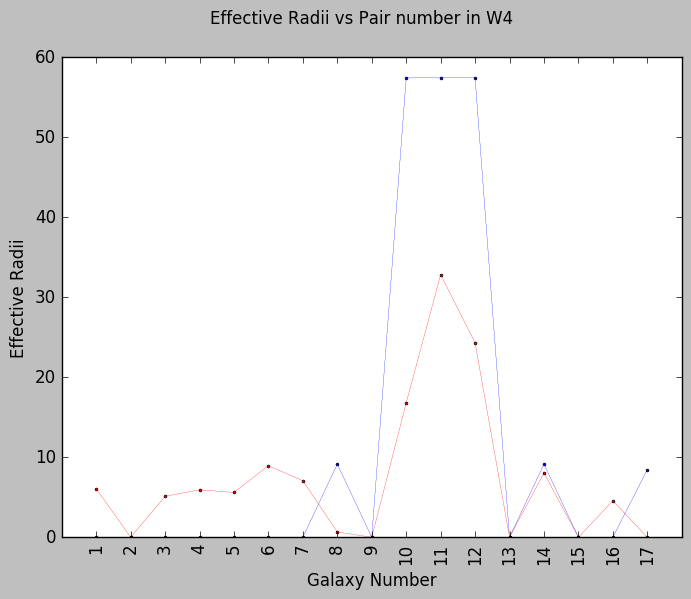

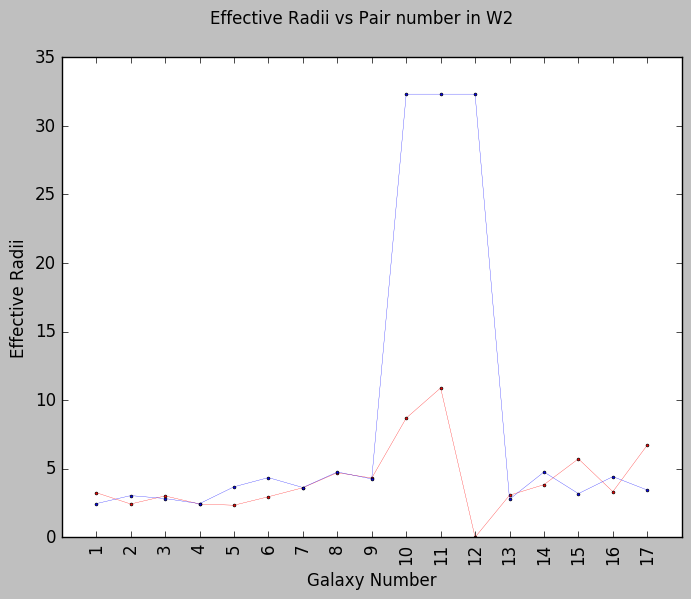

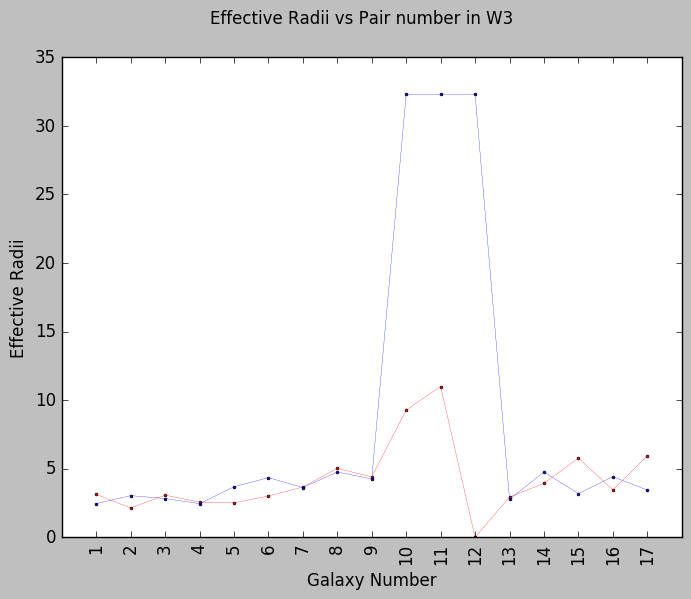

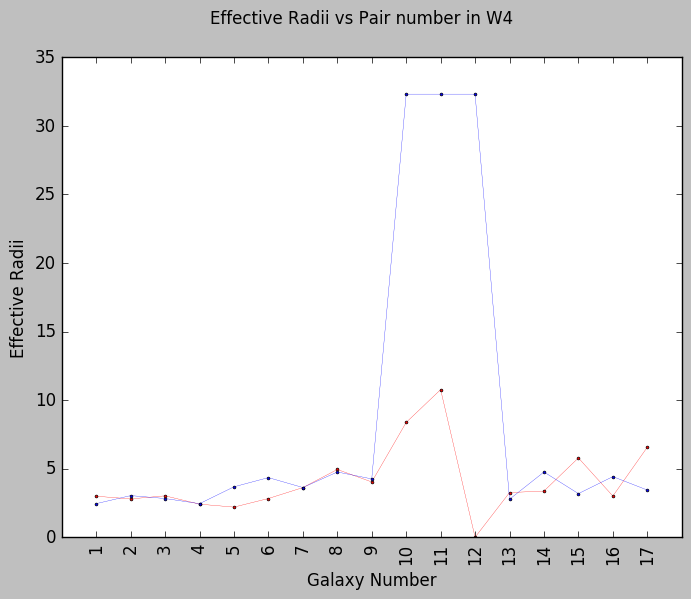

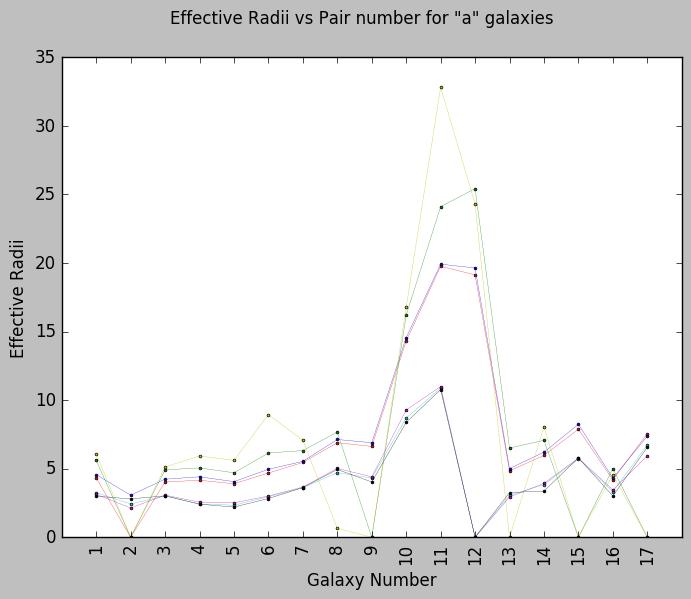

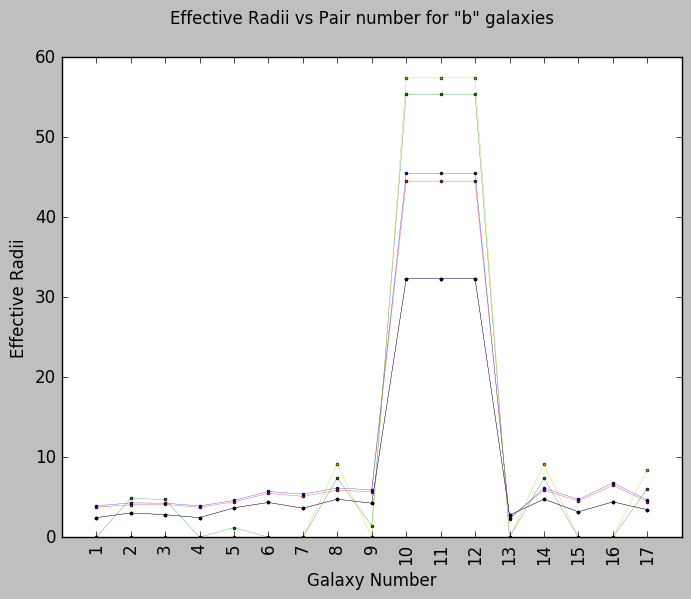

In [38]:
#Polynomially Interpolated effective radii of Major Axis

plt.figure(7)
y9 = W1AMajEffRadPolInt
y10 = W1BMajEffRadPolInt

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number in W1')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii Major Axis')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(8)
y9 = W2AMajEffRadPolInt
y10 = W2BMajEffRadPolInt

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number in W2')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(8)
y9 = W3AMajEffRadPolInt
y10 = W3BMajEffRadPolInt

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number in W3')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(8)
y9 = W4AMajEffRadPolInt
y10 = W4BMajEffRadPolInt

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number in W4')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()


plt.figure(8)
y9 = hAMajEffRadPolInt
y10 = hBMajEffRadPolInt

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number in W2')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(8)
y9 = jAMajEffRadPolInt
y10 = jBMajEffRadPolInt

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number in W3')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(8)
y9 = kAMajEffRadPolInt
y10 = kBMajEffRadPolInt

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number in W4')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()



plt.figure(8)
y5 = hAMajEffRadPolInt
y6 = jAMajEffRadPolInt
y7 = kAMajEffRadPolInt


y1 = W1AMajEffRadPolInt
y2 = W2AMajEffRadPolInt
y3 = W3AMajEffRadPolInt
y4 = W4AMajEffRadPolInt

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y1, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y2, 'bo-', linewidth=0.2, ms=2)
line = plt.plot(x, y3, 'go-', linewidth=0.2, ms=2)
line = plt.plot(x, y4, 'yo-', linewidth=0.2, ms=2)
line = plt.plot(x, y5, 'co-', linewidth=0.2, ms=2)
line = plt.plot(x, y6, 'mo-', linewidth=0.2, ms=2)
line = plt.plot(x, y7, 'ko-', linewidth=0.2, ms=2)


plt.suptitle('Effective Radii vs Pair number for "a" galaxies')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(8)
y5 = hBMajEffRadPolInt
y6 = jBMajEffRadPolInt
y7 = kBMajEffRadPolInt


y1 = W1BMajEffRadPolInt
y2 = W2BMajEffRadPolInt
y3 = W3BMajEffRadPolInt
y4 = W4BMajEffRadPolInt

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y1, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y2, 'bo-', linewidth=0.2, ms=2)
line = plt.plot(x, y3, 'go-', linewidth=0.2, ms=2)
line = plt.plot(x, y4, 'yo-', linewidth=0.2, ms=2)
line = plt.plot(x, y5, 'co-', linewidth=0.2, ms=2)
line = plt.plot(x, y6, 'mo-', linewidth=0.2, ms=2)
line = plt.plot(x, y7, 'ko-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number for "b" galaxies')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

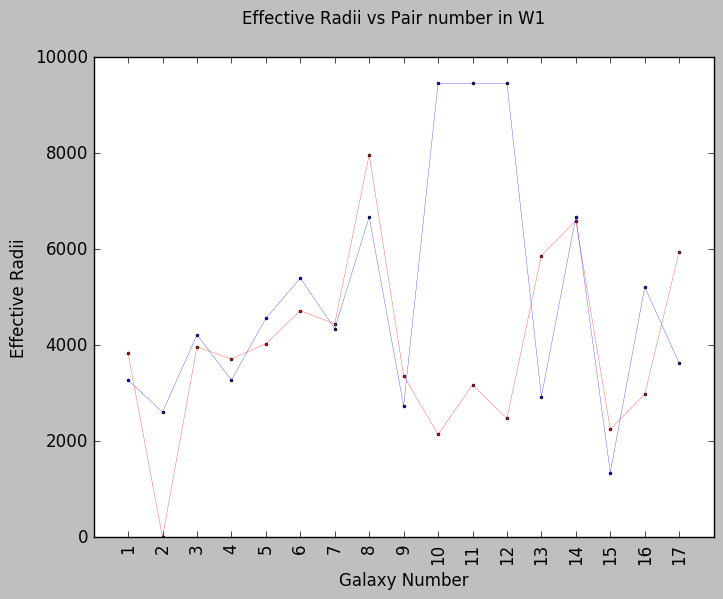

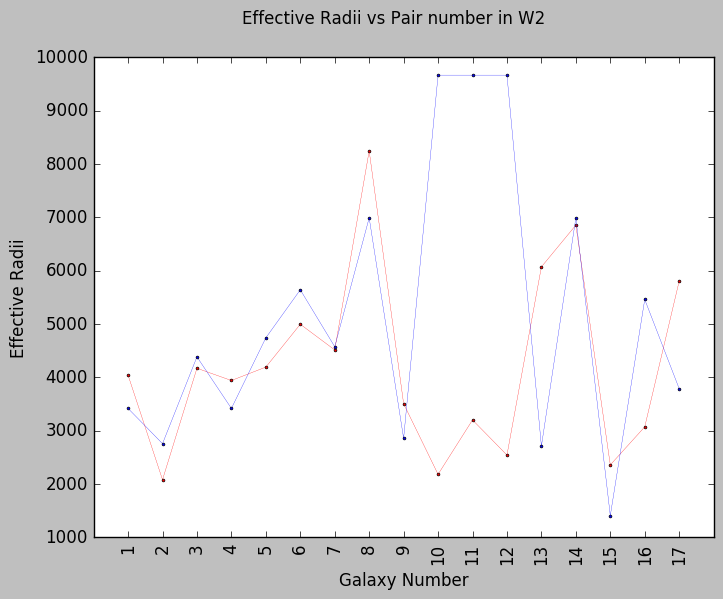

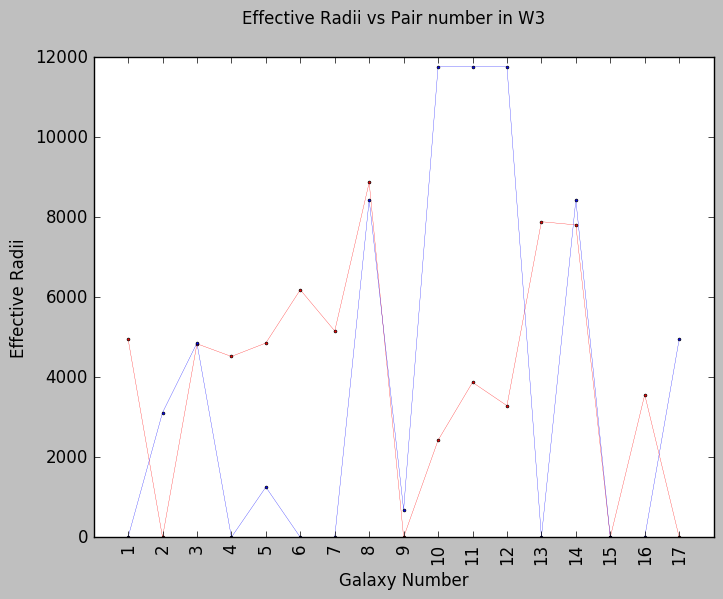

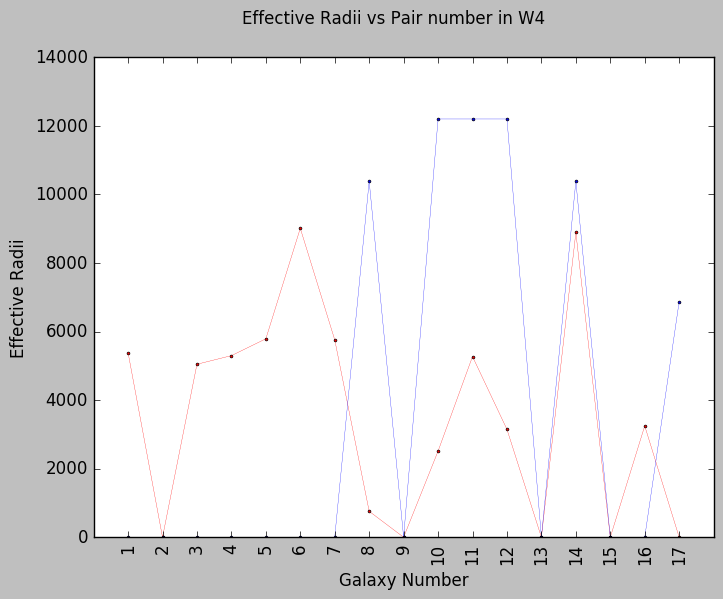

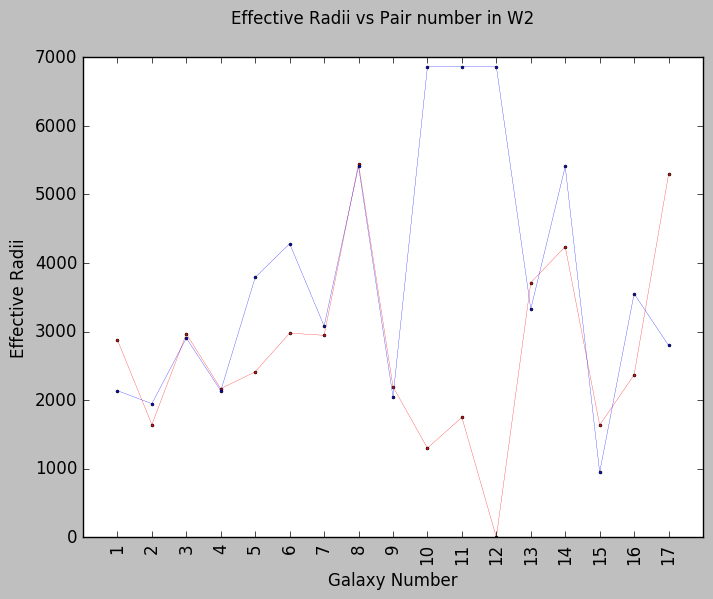

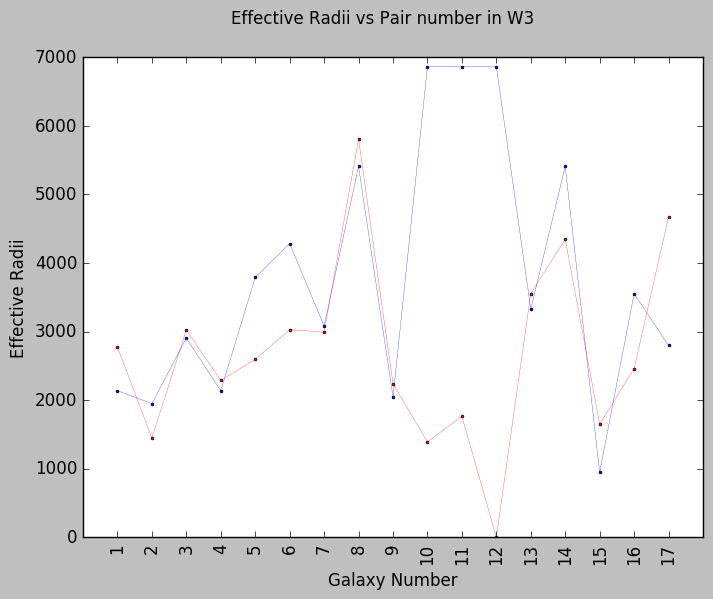

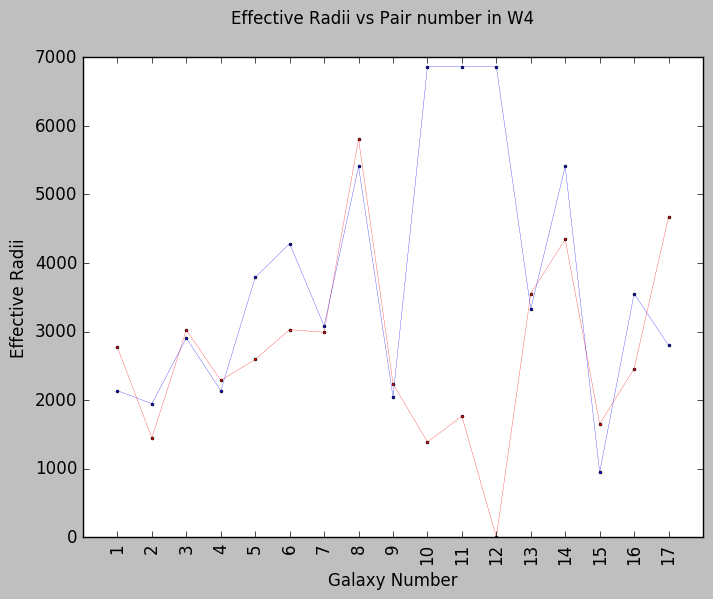

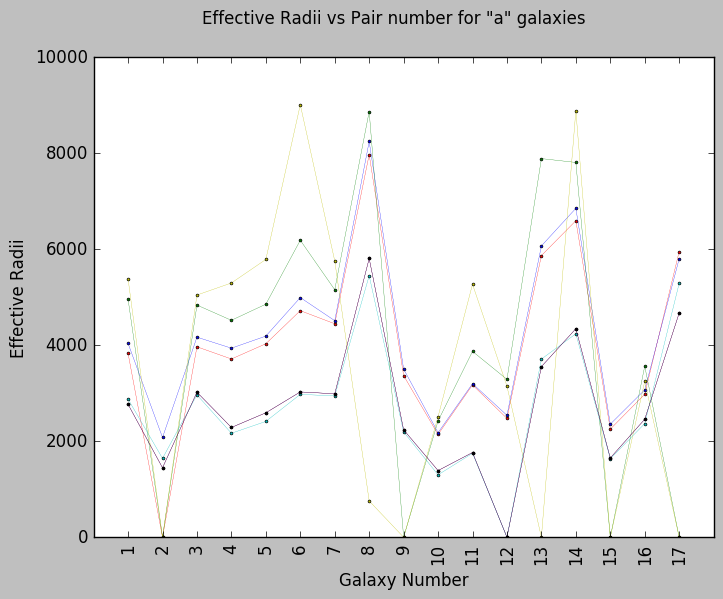

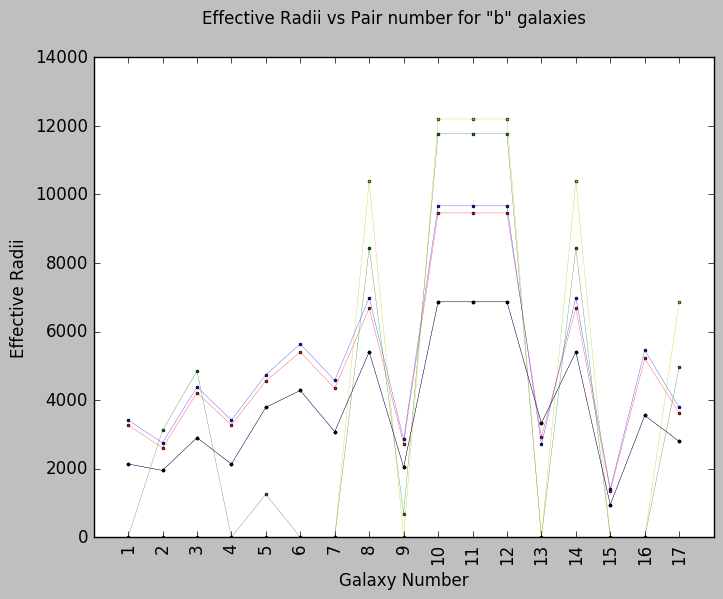

In [39]:
plt.figure(7)
y9 = W1AMajEffRadPolIntDist
y10 = W1BMajEffRadPolIntDist

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number in W1')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(8)
y9 = W2AMajEffRadPolIntDist
y10 = W2BMajEffRadPolIntDist

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number in W2')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(8)
y9 = W3AMajEffRadPolIntDist
y10 = W3BMajEffRadPolIntDist

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number in W3')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(8)
y9 = W4AMajEffRadPolIntDist
y10 = W4BMajEffRadPolIntDist

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number in W4')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(8)
y9 = hAMajEffRadPolIntDist
y10 = hBMajEffRadPolIntDist

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number in W2')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(8)
y9 = jAMajEffRadPolIntDist
y10 = jBMajEffRadPolIntDist

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number in W3')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(8)
y9 = kAMajEffRadPolIntDist
y10 = kBMajEffRadPolIntDist

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y9, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y10, 'bo-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number in W4')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()


plt.figure(8)

y5 = hAMajEffRadPolIntDist
y6 = jAMajEffRadPolIntDist
y7 = kAMajEffRadPolIntDist

y1 = W1AMajEffRadPolIntDist
y2 = W2AMajEffRadPolIntDist
y3 = W3AMajEffRadPolIntDist
y4 = W4AMajEffRadPolIntDist

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y1, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y2, 'bo-', linewidth=0.2, ms=2)
line = plt.plot(x, y3, 'go-', linewidth=0.2, ms=2)
line = plt.plot(x, y4, 'yo-', linewidth=0.2, ms=2)
line = plt.plot(x, y5, 'co-', linewidth=0.2, ms=2)
line = plt.plot(x, y6, 'mo-', linewidth=0.2, ms=2)
line = plt.plot(x, y7, 'ko-', linewidth=0.2, ms=2)


plt.suptitle('Effective Radii vs Pair number for "a" galaxies')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

plt.figure(8)
y5 = hBMajEffRadPolIntDist
y6 = jBMajEffRadPolIntDist
y7 = kBMajEffRadPolIntDist

y1 = W1BMajEffRadPolIntDist
y2 = W2BMajEffRadPolIntDist
y3 = W3BMajEffRadPolIntDist
y4 = W4BMajEffRadPolIntDist

x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
line = plt.plot(x, y1, 'ro-', linewidth=0.2, ms=2)
line = plt.plot(x, y2, 'bo-', linewidth=0.2, ms=2)
line = plt.plot(x, y3, 'go-', linewidth=0.2, ms=2)
line = plt.plot(x, y4, 'yo-', linewidth=0.2, ms=2)
line = plt.plot(x, y5, 'co-', linewidth=0.2, ms=2)
line = plt.plot(x, y6, 'mo-', linewidth=0.2, ms=2)
line = plt.plot(x, y7, 'ko-', linewidth=0.2, ms=2)
plt.suptitle('Effective Radii vs Pair number for "b" galaxies')
plt.xlabel('Galaxy Number')
plt.ylabel('Effective Radii')
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17']
plt.xticks(x, labels, rotation='vertical')
plt.show()

[218.49203852742292, 62.803380253387225, 319.2943535178188, 5.044625871148356, 9.786960846775012, 572.1391547073997, 180.09986139233524]


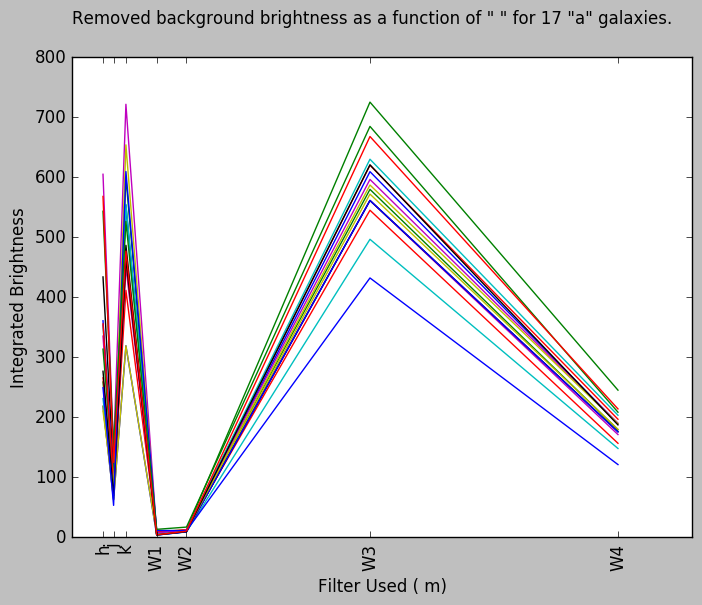

In [40]:
#A Background levels
x= [1.235*10e-6, 1.662*10e-6, 2.159*10e-6, 3.4*10e-6,4.6*10e-6,12*10e-6,22*10e-6]

AGal1points=[AFilterhBackgroundLevels[0],AFilterjBackgroundLevels[0],AFilterkBackgroundLevels[0],AFilter1BackgroundLevels[0],AFilter2BackgroundLevels[0],AFilter3BackgroundLevels[0],AFilter4BackgroundLevels[0]]
AGal2points=[AFilterhBackgroundLevels[1],AFilterjBackgroundLevels[1],AFilterkBackgroundLevels[1],AFilter1BackgroundLevels[1],AFilter2BackgroundLevels[1],AFilter3BackgroundLevels[1],AFilter4BackgroundLevels[1]]
AGal3points=[AFilterhBackgroundLevels[2],AFilterjBackgroundLevels[2],AFilterkBackgroundLevels[2],AFilter1BackgroundLevels[2],AFilter2BackgroundLevels[2],AFilter3BackgroundLevels[2],AFilter4BackgroundLevels[2]]
AGal4points=[AFilterhBackgroundLevels[3],AFilterjBackgroundLevels[3],AFilterkBackgroundLevels[3],AFilter1BackgroundLevels[3],AFilter2BackgroundLevels[3],AFilter3BackgroundLevels[3],AFilter4BackgroundLevels[3]]
AGal5points=[AFilterhBackgroundLevels[4],AFilterjBackgroundLevels[4],AFilterkBackgroundLevels[4],AFilter1BackgroundLevels[4],AFilter2BackgroundLevels[4],AFilter3BackgroundLevels[4],AFilter4BackgroundLevels[4]]
AGal6points=[AFilterhBackgroundLevels[0],AFilterjBackgroundLevels[0],AFilterkBackgroundLevels[0],AFilter1BackgroundLevels[5],AFilter2BackgroundLevels[5],AFilter3BackgroundLevels[5],AFilter4BackgroundLevels[5]]
AGal7points=[AFilterhBackgroundLevels[6],AFilterjBackgroundLevels[6],AFilterkBackgroundLevels[6],AFilter1BackgroundLevels[6],AFilter2BackgroundLevels[6],AFilter3BackgroundLevels[6],AFilter4BackgroundLevels[6]]
AGal8points=[AFilterhBackgroundLevels[7],AFilterjBackgroundLevels[7],AFilterkBackgroundLevels[7],AFilter1BackgroundLevels[7],AFilter2BackgroundLevels[7],AFilter3BackgroundLevels[7],AFilter4BackgroundLevels[7]]
AGal9points=[AFilterhBackgroundLevels[8],AFilterjBackgroundLevels[8],AFilterkBackgroundLevels[8],AFilter1BackgroundLevels[8],AFilter2BackgroundLevels[8],AFilter3BackgroundLevels[8],AFilter4BackgroundLevels[8]]
AGal10points=[AFilterhBackgroundLevels[9],AFilterjBackgroundLevels[9],AFilterkBackgroundLevels[9],AFilter1BackgroundLevels[9],AFilter2BackgroundLevels[9],AFilter3BackgroundLevels[9],AFilter4BackgroundLevels[9]]
AGal11points=[AFilterhBackgroundLevels[10],AFilterjBackgroundLevels[10],AFilterkBackgroundLevels[10],AFilter1BackgroundLevels[10],AFilter2BackgroundLevels[10],AFilter3BackgroundLevels[10],AFilter4BackgroundLevels[10]]
AGal12points=[AFilterhBackgroundLevels[11],AFilterjBackgroundLevels[11],AFilterkBackgroundLevels[11],AFilter1BackgroundLevels[11],AFilter2BackgroundLevels[11],AFilter3BackgroundLevels[11],AFilter4BackgroundLevels[11]]
AGal13points=[AFilterhBackgroundLevels[12],AFilterjBackgroundLevels[12],AFilterkBackgroundLevels[12],AFilter1BackgroundLevels[12],AFilter2BackgroundLevels[12],AFilter3BackgroundLevels[12],AFilter4BackgroundLevels[12]]
AGal14points=[AFilterhBackgroundLevels[13],AFilterjBackgroundLevels[13],AFilterkBackgroundLevels[13],AFilter1BackgroundLevels[13],AFilter2BackgroundLevels[13],AFilter3BackgroundLevels[13],AFilter4BackgroundLevels[13]]
AGal15points=[AFilterhBackgroundLevels[14],AFilterjBackgroundLevels[14],AFilterkBackgroundLevels[14],AFilter1BackgroundLevels[14],AFilter2BackgroundLevels[14],AFilter3BackgroundLevels[14],AFilter4BackgroundLevels[14]]
AGal16points=[AFilterhBackgroundLevels[15],AFilterjBackgroundLevels[15],AFilterkBackgroundLevels[15],AFilter1BackgroundLevels[15],AFilter2BackgroundLevels[15],AFilter3BackgroundLevels[15],AFilter4BackgroundLevels[15]]
AGal17points=[AFilterhBackgroundLevels[16],AFilterjBackgroundLevels[16],AFilterkBackgroundLevels[16],AFilter1BackgroundLevels[16],AFilter2BackgroundLevels[16],AFilter3BackgroundLevels[16],AFilter4BackgroundLevels[16]]

plt.figure(11)
y1 = AGal1points
y2 = AGal2points
y3 = AGal3points
y4 = AGal4points
y5 = AGal5points
y6 = AGal6points
y7 = AGal7points
y8 = AGal8points
y9 = AGal9points
y10 = AGal10points
y11 = AGal11points
y12 = AGal12points
y13 = AGal13points
y14 = AGal14points
y15 = AGal15points
y16 = AGal16points
y17 = AGal17points

print(y6)

line, = plt.plot(x, y1, '-', linewidth=1.0)
line, = plt.plot(x, y2, '-', linewidth=1.0)
line, = plt.plot(x, y3, '-', linewidth=1.0)
line, = plt.plot(x, y4, '-', linewidth=1.0)
line, = plt.plot(x, y5, '-', linewidth=1.0)
line, = plt.plot(x, y6, '-', linewidth=1.0)
line, = plt.plot(x, y7, '-', linewidth=1.0)
line, = plt.plot(x, y8, '-', linewidth=1.0)
line, = plt.plot(x, y9, '-', linewidth=1.0)
line, = plt.plot(x, y10, '-', linewidth=1.0)
line, = plt.plot(x, y11, '-', linewidth=1.0)
line, = plt.plot(x, y12, '-', linewidth=1.0)
line, = plt.plot(x, y13, '-', linewidth=1.0)
line, = plt.plot(x, y14, '-', linewidth=1.0)
line, = plt.plot(x, y15, '-', linewidth=1.0)
line, = plt.plot(x, y16, '-', linewidth=1.0)
line, = plt.plot(x, y17, '-', linewidth=1.0)

plt.suptitle('Removed background brightness as a function of " " for 17 "a" galaxies.')
plt.xlabel('Filter Used ( m)')
plt.ylabel('Integrated Brightness')
labels = ['h','j','k','W1', 'W2', 'W3', 'W4']
plt.xticks(x, labels, rotation='vertical')

plt.show()



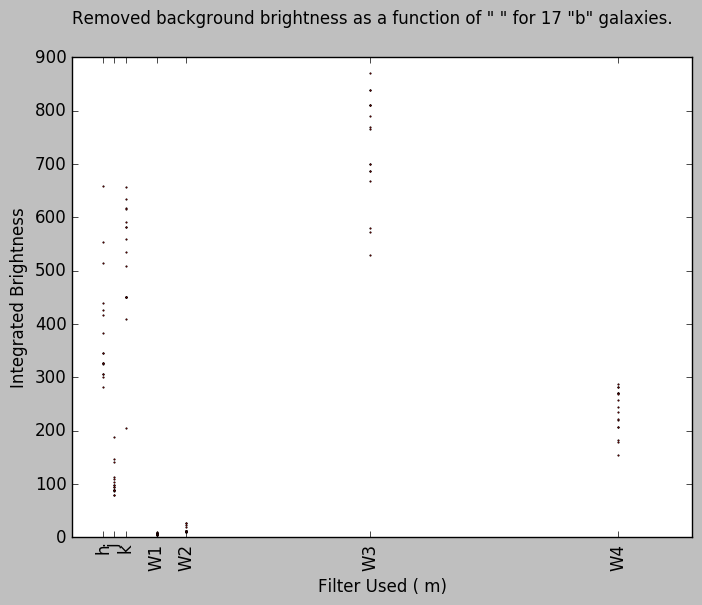

In [45]:
#B Background levels
x= [1.235*10e-6, 1.662*10e-6, 2.159*10e-6, 3.4*10e-6,4.6*10e-6,12*10e-6,22*10e-6]

BGal1points=[BFilterhBackgroundLevels[0],BFilterjBackgroundLevels[0],BFilterkBackgroundLevels[0],BFilter1BackgroundLevels[0],BFilter2BackgroundLevels[0],BFilter3BackgroundLevels[0],BFilter4BackgroundLevels[0]]
BGal2points=[BFilterhBackgroundLevels[1],BFilterjBackgroundLevels[1],BFilterkBackgroundLevels[1],BFilter1BackgroundLevels[1],BFilter2BackgroundLevels[1],BFilter3BackgroundLevels[1],BFilter4BackgroundLevels[1]]
BGal3points=[BFilterhBackgroundLevels[2],BFilterjBackgroundLevels[2],BFilterkBackgroundLevels[2],BFilter1BackgroundLevels[2],BFilter2BackgroundLevels[2],BFilter3BackgroundLevels[2],BFilter4BackgroundLevels[2]]
BGal4points=[BFilterhBackgroundLevels[3],BFilterjBackgroundLevels[3],BFilterkBackgroundLevels[3],BFilter1BackgroundLevels[3],BFilter2BackgroundLevels[3],BFilter3BackgroundLevels[3],BFilter4BackgroundLevels[3]]
BGal5points=[BFilterhBackgroundLevels[4],BFilterjBackgroundLevels[4],BFilterkBackgroundLevels[4],BFilter1BackgroundLevels[4],BFilter2BackgroundLevels[4],BFilter3BackgroundLevels[4],BFilter4BackgroundLevels[4]]
BGal6points=[BFilterhBackgroundLevels[5],BFilterjBackgroundLevels[5],BFilterkBackgroundLevels[5],BFilter1BackgroundLevels[5],BFilter2BackgroundLevels[5],BFilter3BackgroundLevels[5],BFilter4BackgroundLevels[5]]
BGal7points=[BFilterhBackgroundLevels[6],BFilterjBackgroundLevels[6],BFilterkBackgroundLevels[6],BFilter1BackgroundLevels[6],BFilter2BackgroundLevels[6],BFilter3BackgroundLevels[6],BFilter4BackgroundLevels[6]]
BGal8points=[BFilterhBackgroundLevels[7],BFilterjBackgroundLevels[7],BFilterkBackgroundLevels[7],BFilter1BackgroundLevels[7],BFilter2BackgroundLevels[7],BFilter3BackgroundLevels[7],BFilter4BackgroundLevels[7]]
BGal9points=[BFilterhBackgroundLevels[8],BFilterjBackgroundLevels[8],BFilterkBackgroundLevels[8],BFilter1BackgroundLevels[8],BFilter2BackgroundLevels[8],BFilter3BackgroundLevels[8],BFilter4BackgroundLevels[8]]
BGal10points=[BFilterhBackgroundLevels[9],BFilterjBackgroundLevels[9],BFilterkBackgroundLevels[9],BFilter1BackgroundLevels[9],BFilter2BackgroundLevels[9],BFilter3BackgroundLevels[9],BFilter4BackgroundLevels[9]]
BGal11points=[BFilterhBackgroundLevels[10],BFilterjBackgroundLevels[10],BFilterkBackgroundLevels[10],BFilter1BackgroundLevels[10],BFilter2BackgroundLevels[10],BFilter3BackgroundLevels[10],BFilter4BackgroundLevels[10]]
BGal12points=[BFilterhBackgroundLevels[11],BFilterjBackgroundLevels[11],BFilterkBackgroundLevels[11],BFilter1BackgroundLevels[11],BFilter2BackgroundLevels[11],BFilter3BackgroundLevels[11],BFilter4BackgroundLevels[11]]
BGal13points=[BFilterhBackgroundLevels[12],BFilterjBackgroundLevels[12],BFilterkBackgroundLevels[12],BFilter1BackgroundLevels[12],BFilter2BackgroundLevels[12],BFilter3BackgroundLevels[12],BFilter4BackgroundLevels[12]]
BGal14points=[BFilterhBackgroundLevels[13],BFilterjBackgroundLevels[13],BFilterkBackgroundLevels[13],BFilter1BackgroundLevels[13],BFilter2BackgroundLevels[13],BFilter3BackgroundLevels[13],BFilter4BackgroundLevels[13]]
BGal15points=[BFilterhBackgroundLevels[14],BFilterjBackgroundLevels[14],BFilterkBackgroundLevels[14],BFilter1BackgroundLevels[14],BFilter2BackgroundLevels[14],BFilter3BackgroundLevels[14],BFilter4BackgroundLevels[14]]
BGal16points=[BFilterhBackgroundLevels[15],BFilterjBackgroundLevels[15],BFilterkBackgroundLevels[15],BFilter1BackgroundLevels[15],BFilter2BackgroundLevels[15],BFilter3BackgroundLevels[15],BFilter4BackgroundLevels[15]]
BGal17points=[BFilterhBackgroundLevels[16],BFilterjBackgroundLevels[16],BFilterkBackgroundLevels[16],BFilter1BackgroundLevels[16],BFilter2BackgroundLevels[16],BFilter3BackgroundLevels[16],BFilter4BackgroundLevels[16]]



plt.figure(12)
y1 = BGal1points
y2 = BGal2points
y3 = BGal3points
y4 = BGal4points
y5 = BGal5points
y6 = BGal6points
y7 = BGal7points
y8 = BGal8points
y9 = BGal9points
y10 = BGal10points
y11 = BGal11points
y12 = BGal12points
y13 = BGal13points
y14 = BGal14points
y15 = BGal15points
y16 = BGal16points
y17 = BGal17points


line, = plt.plot(x, y1, 'ro-', linewidth=0.0, ms=1)
line, = plt.plot(x, y2, 'ro-', linewidth=0.0, ms=1)
line, = plt.plot(x, y3, 'ro-', linewidth=0.0, ms=1)
line, = plt.plot(x, y4, 'ro-', linewidth=0.0, ms=1)
line, = plt.plot(x, y5, 'ro-', linewidth=0.0, ms=1)
line, = plt.plot(x, y6, 'ro-', linewidth=0.0, ms=1)
line, = plt.plot(x, y7, 'ro-', linewidth=0.0, ms=1)
line, = plt.plot(x, y8, 'ro-', linewidth=0.0, ms=1)
line, = plt.plot(x, y9, 'ro-', linewidth=0.0, ms=1)
line, = plt.plot(x, y10, 'ro-', linewidth=0.0, ms=1)
line, = plt.plot(x, y11, 'ro-', linewidth=0.0, ms=1)
line, = plt.plot(x, y12, 'ro-', linewidth=0.0, ms=1)
line, = plt.plot(x, y13, 'ro-', linewidth=0.0, ms=1)
line, = plt.plot(x, y14, 'ro-', linewidth=0.0, ms=1)
line, = plt.plot(x, y15, 'ro-', linewidth=0.0, ms=1)
line, = plt.plot(x, y16, 'ro-', linewidth=0.0, ms=1)
line, = plt.plot(x, y17, 'ro-', linewidth=0.0, ms=1)

plt.suptitle('Removed background brightness as a function of " " for 17 "b" galaxies.')
plt.xlabel('Filter Used ( m)')
#plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Integrated Brightness')
labels = ['h','j','k','W1', 'W2', 'W3', 'W4']
plt.xticks(x, labels, rotation='vertical')

plt.show()

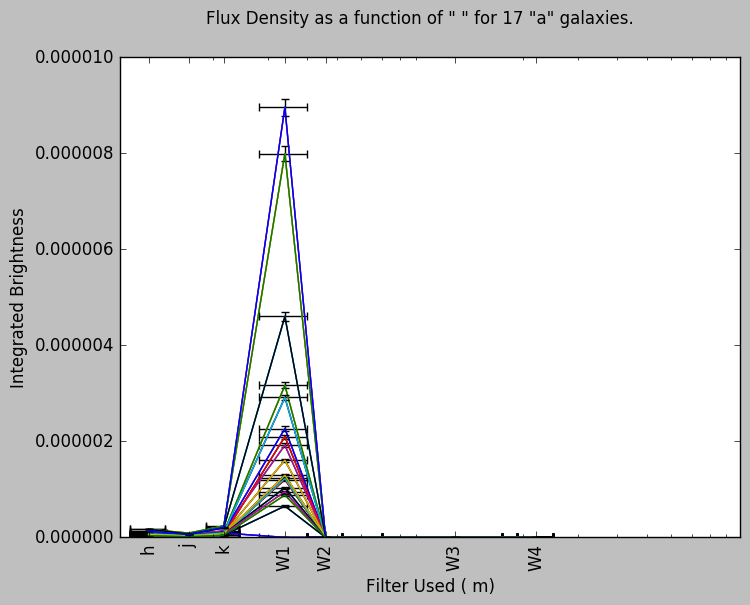

In [46]:
#A galaxies

x= [1.235*10e-6, 1.662*10e-6, 2.159*10e-6, 3.4*10e-6,4.6*10e-6,12*10e-6,22*10e-6]

GalA1points=[AFilterhFluxPerPixelInLargestAperture[0],AFilterjFluxPerPixelInLargestAperture[0],AFilterkFluxPerPixelInLargestAperture[0],AFilter1FluxPerPixelInLargestAperture[0],AFilter2FluxPerPixelInLargestAperture[0],AFilter3FluxPerPixelInLargestAperture[0],AFilter4FluxPerPixelInLargestAperture[0]]
GalA2points=[AFilterhFluxPerPixelInLargestAperture[1],AFilterjFluxPerPixelInLargestAperture[1],AFilterkFluxPerPixelInLargestAperture[1],AFilter1FluxPerPixelInLargestAperture[1],AFilter2FluxPerPixelInLargestAperture[1],AFilter3FluxPerPixelInLargestAperture[1],AFilter4FluxPerPixelInLargestAperture[1]]
GalA3points=[AFilterhFluxPerPixelInLargestAperture[2],AFilterjFluxPerPixelInLargestAperture[2],AFilterkFluxPerPixelInLargestAperture[2],AFilter1FluxPerPixelInLargestAperture[2],AFilter2FluxPerPixelInLargestAperture[2],AFilter3FluxPerPixelInLargestAperture[2],AFilter4FluxPerPixelInLargestAperture[2]]
GalA4points=[AFilterhFluxPerPixelInLargestAperture[3],AFilterjFluxPerPixelInLargestAperture[3],AFilterkFluxPerPixelInLargestAperture[3],AFilter1FluxPerPixelInLargestAperture[3],AFilter2FluxPerPixelInLargestAperture[3],AFilter3FluxPerPixelInLargestAperture[3],AFilter4FluxPerPixelInLargestAperture[3]]
GalA5points=[AFilterhFluxPerPixelInLargestAperture[4],AFilterjFluxPerPixelInLargestAperture[4],AFilterkFluxPerPixelInLargestAperture[4],AFilter1FluxPerPixelInLargestAperture[4],AFilter2FluxPerPixelInLargestAperture[4],AFilter3FluxPerPixelInLargestAperture[4],AFilter4FluxPerPixelInLargestAperture[4]]
GalA6points=[AFilterhFluxPerPixelInLargestAperture[5],AFilterjFluxPerPixelInLargestAperture[5],AFilterkFluxPerPixelInLargestAperture[5],AFilter1FluxPerPixelInLargestAperture[5],AFilter2FluxPerPixelInLargestAperture[5],AFilter3FluxPerPixelInLargestAperture[5],AFilter4FluxPerPixelInLargestAperture[5]]
GalA7points=[AFilterhFluxPerPixelInLargestAperture[6],AFilterjFluxPerPixelInLargestAperture[6],AFilterkFluxPerPixelInLargestAperture[6],AFilter1FluxPerPixelInLargestAperture[6],AFilter2FluxPerPixelInLargestAperture[6],AFilter3FluxPerPixelInLargestAperture[6],AFilter4FluxPerPixelInLargestAperture[6]]
GalA8points=[AFilterhFluxPerPixelInLargestAperture[7],AFilterjFluxPerPixelInLargestAperture[7],AFilterkFluxPerPixelInLargestAperture[7],AFilter1FluxPerPixelInLargestAperture[7],AFilter2FluxPerPixelInLargestAperture[7],AFilter3FluxPerPixelInLargestAperture[7],AFilter4FluxPerPixelInLargestAperture[7]]
GalA9points=[AFilterhFluxPerPixelInLargestAperture[8],AFilterjFluxPerPixelInLargestAperture[8],AFilterkFluxPerPixelInLargestAperture[8],AFilter1FluxPerPixelInLargestAperture[8],AFilter2FluxPerPixelInLargestAperture[8],AFilter3FluxPerPixelInLargestAperture[8],AFilter4FluxPerPixelInLargestAperture[8]]
GalA10points=[AFilterhFluxPerPixelInLargestAperture[9],AFilterjFluxPerPixelInLargestAperture[9],AFilterkFluxPerPixelInLargestAperture[9],AFilter1FluxPerPixelInLargestAperture[9],AFilter2FluxPerPixelInLargestAperture[9],AFilter3FluxPerPixelInLargestAperture[9],AFilter4FluxPerPixelInLargestAperture[9]]
GalA11points=[AFilterhFluxPerPixelInLargestAperture[10],AFilterjFluxPerPixelInLargestAperture[10],AFilterkFluxPerPixelInLargestAperture[10],AFilter1FluxPerPixelInLargestAperture[10],AFilter2FluxPerPixelInLargestAperture[10],AFilter3FluxPerPixelInLargestAperture[10],AFilter4FluxPerPixelInLargestAperture[10]]
GalA12points=[AFilterhFluxPerPixelInLargestAperture[11],AFilterjFluxPerPixelInLargestAperture[11],AFilterkFluxPerPixelInLargestAperture[11],AFilter1FluxPerPixelInLargestAperture[11],AFilter2FluxPerPixelInLargestAperture[11],AFilter3FluxPerPixelInLargestAperture[11],AFilter4FluxPerPixelInLargestAperture[11]]
GalA13points=[AFilterhFluxPerPixelInLargestAperture[12],AFilterjFluxPerPixelInLargestAperture[12],AFilterkFluxPerPixelInLargestAperture[12],AFilter1FluxPerPixelInLargestAperture[12],AFilter2FluxPerPixelInLargestAperture[12],AFilter3FluxPerPixelInLargestAperture[12],AFilter4FluxPerPixelInLargestAperture[12]]
GalA14points=[AFilterhFluxPerPixelInLargestAperture[13],AFilterjFluxPerPixelInLargestAperture[13],AFilterkFluxPerPixelInLargestAperture[13],AFilter1FluxPerPixelInLargestAperture[13],AFilter2FluxPerPixelInLargestAperture[13],AFilter3FluxPerPixelInLargestAperture[13],AFilter4FluxPerPixelInLargestAperture[13]]
GalA15points=[AFilterhFluxPerPixelInLargestAperture[14],AFilterjFluxPerPixelInLargestAperture[14],AFilterkFluxPerPixelInLargestAperture[14],AFilter1FluxPerPixelInLargestAperture[14],AFilter2FluxPerPixelInLargestAperture[14],AFilter3FluxPerPixelInLargestAperture[14],AFilter4FluxPerPixelInLargestAperture[14]]
GalA16points=[AFilterhFluxPerPixelInLargestAperture[15],AFilterjFluxPerPixelInLargestAperture[15],AFilterkFluxPerPixelInLargestAperture[15],AFilter1FluxPerPixelInLargestAperture[15],AFilter2FluxPerPixelInLargestAperture[15],AFilter3FluxPerPixelInLargestAperture[15],AFilter4FluxPerPixelInLargestAperture[15]]
GalA17points=[AFilterhFluxPerPixelInLargestAperture[16],AFilterjFluxPerPixelInLargestAperture[16],AFilterkFluxPerPixelInLargestAperture[16],AFilter1FluxPerPixelInLargestAperture[16],AFilter2FluxPerPixelInLargestAperture[16],AFilter3FluxPerPixelInLargestAperture[16],AFilter4FluxPerPixelInLargestAperture[16]]

plt.figure(13)
y1 = GalA1points
y2 = GalA2points
y3 = GalA3points
y4 = GalA4points
y5 = GalA5points
y6 = GalA6points
y7 = GalA7points
y8 = GalA8points
y9 = GalA9points
y10 = GalA10points
y11 = GalA11points
y12 = GalA12points
y13 = GalA13points
y14 = GalA14points
y15 = GalA15points
y16 = GalA16points
y17 = GalA17points

line, = plt.plot(x, y1, '-', linewidth=1.0)
line, = plt.plot(x, y2, '-', linewidth=1.0)
line, = plt.plot(x, y3, '-', linewidth=1.0)
line, = plt.plot(x, y4, '-', linewidth=1.0)
line, = plt.plot(x, y5, '-', linewidth=1.0)
line, = plt.plot(x, y6, '-', linewidth=1.0)
line, = plt.plot(x, y7, '-', linewidth=1.0)
line, = plt.plot(x, y8, '-', linewidth=1.0)
line, = plt.plot(x, y9, '-', linewidth=1.0)
line, = plt.plot(x, y10, '-', linewidth=1.0)
line, = plt.plot(x, y11, '-', linewidth=1.0)
line, = plt.plot(x, y12, '-', linewidth=1.0)
line, = plt.plot(x, y13, '-', linewidth=1.0)
line, = plt.plot(x, y14, '-', linewidth=1.0)
line, = plt.plot(x, y15, '-', linewidth=1.0)
line, = plt.plot(x, y16, '-', linewidth=1.0)
line, = plt.plot(x, y17, '-', linewidth=1.0)
plt.suptitle('Flux Density as a function of " " for 17 "a" galaxies.')
plt.xlabel('Filter Used ( m)')
plt.xscale('log')

plt.xscale('log')

plt.errorbar(x, y1, xerr=(0.16*10e-6, 0.25*10e-6, 0.26*10e-6, 0.6*10e-6, 0.6*10e-6, 5*10e-6, 3*10e-6), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y2, xerr=(0.16*10e-6, 0.25*10e-6, 0.26*10e-6, 0.6*10e-6, 0.6*10e-6, 5*10e-6, 3*10e-6), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y3, xerr=(0.16*10e-6, 0.25*10e-6, 0.26*10e-6, 0.6*10e-6, 0.6*10e-6, 5*10e-6, 3*10e-6), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y4, xerr=(0.16*10e-6, 0.25*10e-6, 0.26*10e-6, 0.6*10e-6, 0.6*10e-6, 5*10e-6, 3*10e-6), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y5, xerr=(0.16*10e-6, 0.25*10e-6, 0.26*10e-6, 0.6*10e-6, 0.6*10e-6, 5*10e-6, 3*10e-6), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y6, xerr=(0.16*10e-6, 0.25*10e-6, 0.26*10e-6, 0.6*10e-6, 0.6*10e-6, 5*10e-6, 3*10e-6), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y7, xerr=(0.16*10e-6, 0.25*10e-6, 0.26*10e-6, 0.6*10e-6, 0.6*10e-6, 5*10e-6, 3*10e-6), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y8, xerr=(0.16*10e-6, 0.25*10e-6, 0.26*10e-6, 0.6*10e-6, 0.6*10e-6, 5*10e-6, 3*10e-6), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y9, xerr=(0.16*10e-6, 0.25*10e-6, 0.26*10e-6, 0.6*10e-6, 0.6*10e-6, 5*10e-6, 3*10e-6), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y10, xerr=(0.16*10e-6, 0.25*10e-6, 0.26*10e-6, 0.6*10e-6, 0.6*10e-6, 5*10e-6, 3*10e-6), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y11, xerr=(0.16*10e-6, 0.25*10e-6, 0.26*10e-6, 0.6*10e-6, 0.6*10e-6, 5*10e-6, 3*10e-6), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y12, xerr=(0.16*10e-6, 0.25*10e-6, 0.26*10e-6, 0.6*10e-6, 0.6*10e-6, 5*10e-6, 3*10e-6), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y13, xerr=(0.16*10e-6, 0.25*10e-6, 0.26*10e-6, 0.6*10e-6, 0.6*10e-6, 5*10e-6, 3*10e-6), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y14, xerr=(0.16*10e-6, 0.25*10e-6, 0.26*10e-6, 0.6*10e-6, 0.6*10e-6, 5*10e-6, 3*10e-6), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y15, xerr=(0.16*10e-6, 0.25*10e-6, 0.26*10e-6, 0.6*10e-6, 0.6*10e-6, 5*10e-6, 3*10e-6), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y16, xerr=(0.16*10e-6, 0.25*10e-6, 0.26*10e-6, 0.6*10e-6, 0.6*10e-6, 5*10e-6, 3*10e-6), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y17, xerr=(0.16*10e-6, 0.25*10e-6, 0.26*10e-6, 0.6*10e-6, 0.6*10e-6, 5*10e-6, 3*10e-6), ecolor='black', capthick=1.0, lw=1)

plt.errorbar(x, y1, yerr=(AFilterhFluxPerPixelInLargestAperture[0]*0.02, AFilterjFluxPerPixelInLargestAperture[0]*0.02, AFilterkFluxPerPixelInLargestAperture[0]*0.02, AFilter1FluxPerPixelInLargestAperture[0]*0.02, AFilter2FluxPerPixelInLargestAperture[0]*0.02, AFilter3FluxPerPixelInLargestAperture[0]*0.02, AFilter4FluxPerPixelInLargestAperture[0]*0.02), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y2, yerr=(AFilterhFluxPerPixelInLargestAperture[1]*0.02, AFilterjFluxPerPixelInLargestAperture[1]*0.02, AFilterkFluxPerPixelInLargestAperture[1]*0.02, AFilter1FluxPerPixelInLargestAperture[1]*0.02, AFilter2FluxPerPixelInLargestAperture[1]*0.02, AFilter3FluxPerPixelInLargestAperture[1]*0.02, AFilter4FluxPerPixelInLargestAperture[1]*0.02), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y3, yerr=(AFilterhFluxPerPixelInLargestAperture[2]*0.02, AFilterjFluxPerPixelInLargestAperture[2]*0.02, AFilterkFluxPerPixelInLargestAperture[2]*0.02, AFilter1FluxPerPixelInLargestAperture[2]*0.02, AFilter2FluxPerPixelInLargestAperture[2]*0.02, AFilter3FluxPerPixelInLargestAperture[2]*0.02, AFilter4FluxPerPixelInLargestAperture[2]*0.02), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y4, yerr=(AFilterhFluxPerPixelInLargestAperture[3]*0.02, AFilterjFluxPerPixelInLargestAperture[3]*0.02, AFilterkFluxPerPixelInLargestAperture[3]*0.02, AFilter1FluxPerPixelInLargestAperture[3]*0.02, AFilter2FluxPerPixelInLargestAperture[3]*0.02, AFilter3FluxPerPixelInLargestAperture[3]*0.02, AFilter4FluxPerPixelInLargestAperture[3]*0.02), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y5, yerr=(AFilterhFluxPerPixelInLargestAperture[4]*0.02, AFilterjFluxPerPixelInLargestAperture[4]*0.02, AFilterkFluxPerPixelInLargestAperture[4]*0.02, AFilter1FluxPerPixelInLargestAperture[4]*0.02, AFilter2FluxPerPixelInLargestAperture[4]*0.02, AFilter3FluxPerPixelInLargestAperture[4]*0.02, AFilter4FluxPerPixelInLargestAperture[4]*0.02), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y6, yerr=(AFilterhFluxPerPixelInLargestAperture[5]*0.02, AFilterjFluxPerPixelInLargestAperture[5]*0.02, AFilterkFluxPerPixelInLargestAperture[5]*0.02, AFilter1FluxPerPixelInLargestAperture[5]*0.02, AFilter2FluxPerPixelInLargestAperture[5]*0.02, AFilter3FluxPerPixelInLargestAperture[5]*0.02, AFilter4FluxPerPixelInLargestAperture[5]*0.02), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y7, yerr=(AFilterhFluxPerPixelInLargestAperture[6]*0.02, AFilterjFluxPerPixelInLargestAperture[6]*0.02, AFilterkFluxPerPixelInLargestAperture[6]*0.02, AFilter1FluxPerPixelInLargestAperture[6]*0.02, AFilter2FluxPerPixelInLargestAperture[6]*0.02, AFilter3FluxPerPixelInLargestAperture[6]*0.02, AFilter4FluxPerPixelInLargestAperture[6]*0.02), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y8, yerr=(AFilterhFluxPerPixelInLargestAperture[7]*0.02, AFilterjFluxPerPixelInLargestAperture[7]*0.02, AFilterkFluxPerPixelInLargestAperture[7]*0.02, AFilter1FluxPerPixelInLargestAperture[7]*0.02, AFilter2FluxPerPixelInLargestAperture[7]*0.02, AFilter3FluxPerPixelInLargestAperture[7]*0.02, AFilter4FluxPerPixelInLargestAperture[7]*0.02), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y9, yerr=(AFilterhFluxPerPixelInLargestAperture[8]*0.02, AFilterjFluxPerPixelInLargestAperture[8]*0.02, AFilterkFluxPerPixelInLargestAperture[8]*0.02, AFilter1FluxPerPixelInLargestAperture[8]*0.02, AFilter2FluxPerPixelInLargestAperture[8]*0.02, AFilter3FluxPerPixelInLargestAperture[8]*0.02, AFilter4FluxPerPixelInLargestAperture[8]*0.02), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y10, yerr=(AFilterhFluxPerPixelInLargestAperture[9]*0.02, AFilterjFluxPerPixelInLargestAperture[9]*0.02, AFilterkFluxPerPixelInLargestAperture[9]*0.02, AFilter1FluxPerPixelInLargestAperture[9]*0.02, AFilter2FluxPerPixelInLargestAperture[9]*0.02, AFilter3FluxPerPixelInLargestAperture[9]*0.02, AFilter4FluxPerPixelInLargestAperture[9]*0.02), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y11, yerr=(AFilterhFluxPerPixelInLargestAperture[10]*0.02, AFilterjFluxPerPixelInLargestAperture[10]*0.02, AFilterkFluxPerPixelInLargestAperture[10]*0.02, AFilter1FluxPerPixelInLargestAperture[10]*0.02, AFilter2FluxPerPixelInLargestAperture[10]*0.02, AFilter3FluxPerPixelInLargestAperture[10]*0.02, AFilter4FluxPerPixelInLargestAperture[10]*0.02), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y12, yerr=(AFilterhFluxPerPixelInLargestAperture[11]*0.02, AFilterjFluxPerPixelInLargestAperture[11]*0.02, AFilterkFluxPerPixelInLargestAperture[11]*0.02, AFilter1FluxPerPixelInLargestAperture[11]*0.02, AFilter2FluxPerPixelInLargestAperture[11]*0.02, AFilter3FluxPerPixelInLargestAperture[11]*0.02, AFilter4FluxPerPixelInLargestAperture[11]*0.02), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y13, yerr=(AFilterhFluxPerPixelInLargestAperture[12]*0.02, AFilterjFluxPerPixelInLargestAperture[12]*0.02, AFilterkFluxPerPixelInLargestAperture[12]*0.02, AFilter1FluxPerPixelInLargestAperture[12]*0.02, AFilter2FluxPerPixelInLargestAperture[12]*0.02, AFilter3FluxPerPixelInLargestAperture[12]*0.02, AFilter4FluxPerPixelInLargestAperture[12]*0.02), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y14, yerr=(AFilterhFluxPerPixelInLargestAperture[13]*0.02, AFilterjFluxPerPixelInLargestAperture[13]*0.02, AFilterkFluxPerPixelInLargestAperture[13]*0.02, AFilter1FluxPerPixelInLargestAperture[13]*0.02, AFilter2FluxPerPixelInLargestAperture[13]*0.02, AFilter3FluxPerPixelInLargestAperture[13]*0.02, AFilter4FluxPerPixelInLargestAperture[13]*0.02), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y15, yerr=(AFilterhFluxPerPixelInLargestAperture[14]*0.02, AFilterjFluxPerPixelInLargestAperture[14]*0.02, AFilterkFluxPerPixelInLargestAperture[14]*0.02, AFilter1FluxPerPixelInLargestAperture[14]*0.02, AFilter2FluxPerPixelInLargestAperture[14]*0.02, AFilter3FluxPerPixelInLargestAperture[14]*0.02, AFilter4FluxPerPixelInLargestAperture[14]*0.02), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y16, yerr=(AFilterhFluxPerPixelInLargestAperture[15]*0.02, AFilterjFluxPerPixelInLargestAperture[15]*0.02, AFilterkFluxPerPixelInLargestAperture[15]*0.02, AFilter1FluxPerPixelInLargestAperture[15]*0.02, AFilter2FluxPerPixelInLargestAperture[15]*0.02, AFilter3FluxPerPixelInLargestAperture[15]*0.02, AFilter4FluxPerPixelInLargestAperture[15]*0.02), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y17, yerr=(AFilterhFluxPerPixelInLargestAperture[16]*0.02, AFilterjFluxPerPixelInLargestAperture[16]*0.02, AFilterkFluxPerPixelInLargestAperture[16]*0.02, AFilter1FluxPerPixelInLargestAperture[16]*0.02, AFilter2FluxPerPixelInLargestAperture[16]*0.02, AFilter3FluxPerPixelInLargestAperture[16]*0.02, AFilter4FluxPerPixelInLargestAperture[16]*0.02), ecolor='black', capthick=1.0, lw=1)



plt.ylabel('Integrated Brightness')
labels = ['h','j','k','W1', 'W2', 'W3', 'W4']
plt.xticks(x, labels, rotation='vertical')

plt.show()


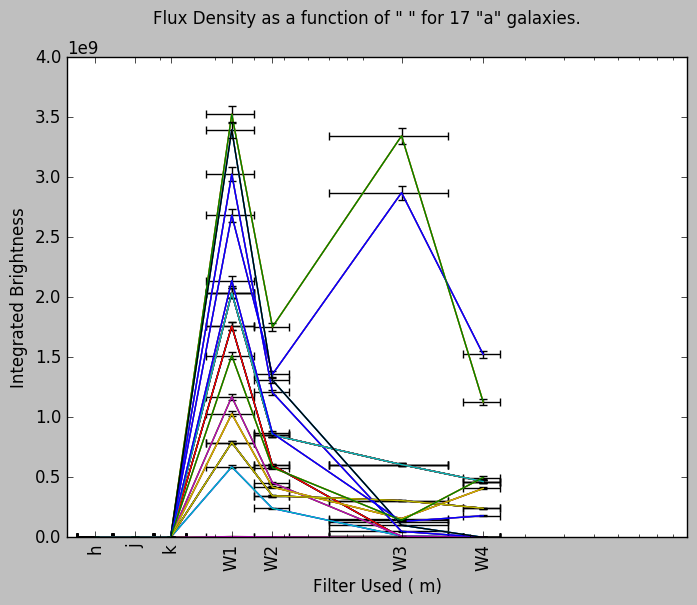

In [26]:
#B galaxies

x= [1.235*10e-6, 1.662*10e-6, 2.159*10e-6, 3.4*10e-6,4.6*10e-6,12*10e-6,22*10e-6]
#x=[1,2,3,4]

GalB1points=[BFilterhFluxPerPixelInLargestAperture[0],BFilterjFluxPerPixelInLargestAperture[0],BFilterkFluxPerPixelInLargestAperture[0],BFilter1FluxPerPixelInLargestAperture[0],BFilter2FluxPerPixelInLargestAperture[0],BFilter3FluxPerPixelInLargestAperture[0],BFilter4FluxPerPixelInLargestAperture[0]]
GalB2points=[BFilterhFluxPerPixelInLargestAperture[1],BFilterjFluxPerPixelInLargestAperture[1],BFilterkFluxPerPixelInLargestAperture[1],BFilter1FluxPerPixelInLargestAperture[1],BFilter2FluxPerPixelInLargestAperture[1],BFilter3FluxPerPixelInLargestAperture[1],BFilter4FluxPerPixelInLargestAperture[1]]
GalB3points=[BFilterhFluxPerPixelInLargestAperture[2],BFilterjFluxPerPixelInLargestAperture[2],BFilterkFluxPerPixelInLargestAperture[2],BFilter1FluxPerPixelInLargestAperture[2],BFilter2FluxPerPixelInLargestAperture[2],BFilter3FluxPerPixelInLargestAperture[2],BFilter4FluxPerPixelInLargestAperture[2]]
GalB4points=[BFilterhFluxPerPixelInLargestAperture[3],BFilterjFluxPerPixelInLargestAperture[3],BFilterkFluxPerPixelInLargestAperture[3],BFilter1FluxPerPixelInLargestAperture[3],BFilter2FluxPerPixelInLargestAperture[3],BFilter3FluxPerPixelInLargestAperture[3],BFilter4FluxPerPixelInLargestAperture[3]]
GalB5points=[BFilterhFluxPerPixelInLargestAperture[4],BFilterjFluxPerPixelInLargestAperture[4],BFilterkFluxPerPixelInLargestAperture[4],BFilter1FluxPerPixelInLargestAperture[4],BFilter2FluxPerPixelInLargestAperture[4],BFilter3FluxPerPixelInLargestAperture[4],BFilter4FluxPerPixelInLargestAperture[4]]
GalB6points=[BFilterhFluxPerPixelInLargestAperture[5],BFilterjFluxPerPixelInLargestAperture[5],BFilterkFluxPerPixelInLargestAperture[5],BFilter1FluxPerPixelInLargestAperture[5],BFilter2FluxPerPixelInLargestAperture[5],BFilter3FluxPerPixelInLargestAperture[5],BFilter4FluxPerPixelInLargestAperture[5]]
GalB7points=[BFilterhFluxPerPixelInLargestAperture[6],BFilterjFluxPerPixelInLargestAperture[6],BFilterkFluxPerPixelInLargestAperture[6],BFilter1FluxPerPixelInLargestAperture[6],BFilter2FluxPerPixelInLargestAperture[6],BFilter3FluxPerPixelInLargestAperture[6],BFilter4FluxPerPixelInLargestAperture[6]]
GalB8points=[BFilterhFluxPerPixelInLargestAperture[7],BFilterjFluxPerPixelInLargestAperture[7],BFilterkFluxPerPixelInLargestAperture[7],BFilter1FluxPerPixelInLargestAperture[7],BFilter2FluxPerPixelInLargestAperture[7],BFilter3FluxPerPixelInLargestAperture[7],BFilter4FluxPerPixelInLargestAperture[7]]
GalB9points=[BFilterhFluxPerPixelInLargestAperture[8],BFilterjFluxPerPixelInLargestAperture[8],BFilterkFluxPerPixelInLargestAperture[8],BFilter1FluxPerPixelInLargestAperture[8],BFilter2FluxPerPixelInLargestAperture[8],BFilter3FluxPerPixelInLargestAperture[8],BFilter4FluxPerPixelInLargestAperture[8]]
GalB10points=[BFilterhFluxPerPixelInLargestAperture[9],BFilterjFluxPerPixelInLargestAperture[9],BFilterkFluxPerPixelInLargestAperture[9],BFilter1FluxPerPixelInLargestAperture[9],BFilter2FluxPerPixelInLargestAperture[9],BFilter3FluxPerPixelInLargestAperture[9],BFilter4FluxPerPixelInLargestAperture[9]]
GalB11points=[BFilterhFluxPerPixelInLargestAperture[10],BFilterjFluxPerPixelInLargestAperture[10],BFilterkFluxPerPixelInLargestAperture[10],BFilter1FluxPerPixelInLargestAperture[10],BFilter2FluxPerPixelInLargestAperture[10],BFilter3FluxPerPixelInLargestAperture[10],BFilter4FluxPerPixelInLargestAperture[10]]
GalB12points=[BFilterhFluxPerPixelInLargestAperture[11],BFilterjFluxPerPixelInLargestAperture[11],BFilterkFluxPerPixelInLargestAperture[11],BFilter1FluxPerPixelInLargestAperture[11],BFilter2FluxPerPixelInLargestAperture[11],BFilter3FluxPerPixelInLargestAperture[11],BFilter4FluxPerPixelInLargestAperture[11]]
GalB13points=[BFilterhFluxPerPixelInLargestAperture[12],BFilterjFluxPerPixelInLargestAperture[12],BFilterkFluxPerPixelInLargestAperture[12],BFilter1FluxPerPixelInLargestAperture[12],BFilter2FluxPerPixelInLargestAperture[12],BFilter3FluxPerPixelInLargestAperture[12],BFilter4FluxPerPixelInLargestAperture[12]]
GalB14points=[BFilterhFluxPerPixelInLargestAperture[13],BFilterjFluxPerPixelInLargestAperture[13],BFilterkFluxPerPixelInLargestAperture[13],BFilter1FluxPerPixelInLargestAperture[13],BFilter2FluxPerPixelInLargestAperture[13],BFilter3FluxPerPixelInLargestAperture[13],BFilter4FluxPerPixelInLargestAperture[13]]
GalB15points=[BFilterhFluxPerPixelInLargestAperture[14],BFilterjFluxPerPixelInLargestAperture[14],BFilterkFluxPerPixelInLargestAperture[14],BFilter1FluxPerPixelInLargestAperture[14],BFilter2FluxPerPixelInLargestAperture[14],BFilter3FluxPerPixelInLargestAperture[14],BFilter4FluxPerPixelInLargestAperture[14]]
GalB16points=[BFilterhFluxPerPixelInLargestAperture[15],BFilterjFluxPerPixelInLargestAperture[15],BFilterkFluxPerPixelInLargestAperture[15],BFilter1FluxPerPixelInLargestAperture[15],BFilter2FluxPerPixelInLargestAperture[15],BFilter3FluxPerPixelInLargestAperture[15],BFilter4FluxPerPixelInLargestAperture[15]]
GalB17points=[BFilterhFluxPerPixelInLargestAperture[16],BFilterjFluxPerPixelInLargestAperture[16],BFilterkFluxPerPixelInLargestAperture[16],BFilter1FluxPerPixelInLargestAperture[16],BFilter2FluxPerPixelInLargestAperture[16],BFilter3FluxPerPixelInLargestAperture[16],BFilter4FluxPerPixelInLargestAperture[16]]

plt.figure(13)
y1 = GalB1points
y2 = GalB2points
y3 = GalB3points
y4 = GalB4points
y5 = GalB5points
y6 = GalB6points
y7 = GalB7points
y8 = GalB8points
y9 = GalB9points
y10 = GalB10points
y11 = GalB11points
y12 = GalB12points
y13 = GalB13points
y14 = GalB14points
y15 = GalB15points
y16 = GalB16points
y17 = GalB17points

line, = plt.plot(x, y1, '-', linewidth=1.0)
line, = plt.plot(x, y2, '-', linewidth=1.0)
line, = plt.plot(x, y3, '-', linewidth=1.0)
line, = plt.plot(x, y4, '-', linewidth=1.0)
line, = plt.plot(x, y5, '-', linewidth=1.0)
line, = plt.plot(x, y6, '-', linewidth=1.0)
line, = plt.plot(x, y7, '-', linewidth=1.0)
line, = plt.plot(x, y8, '-', linewidth=1.0)
line, = plt.plot(x, y9, '-', linewidth=1.0)
line, = plt.plot(x, y10, '-', linewidth=1.0)
line, = plt.plot(x, y11, '-', linewidth=1.0)
line, = plt.plot(x, y12, '-', linewidth=1.0)
line, = plt.plot(x, y13, '-', linewidth=1.0)
line, = plt.plot(x, y14, '-', linewidth=1.0)
line, = plt.plot(x, y15, '-', linewidth=1.0)
line, = plt.plot(x, y16, '-', linewidth=1.0)
line, = plt.plot(x, y17, '-', linewidth=1.0)
plt.suptitle('Flux Density as a function of " " for 17 "a" galaxies.')
plt.xlabel('Filter Used ( m)')
plt.xscale('log')
#plt.yscale('log')

plt.errorbar(x, y1, xerr=(0.16*10e-6, 0.25*10e-6, 0.26*10e-6, 0.6*10e-6, 0.6*10e-6, 5*10e-6, 3*10e-6), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y2, xerr=(0.16*10e-6, 0.25*10e-6, 0.26*10e-6, 0.6*10e-6, 0.6*10e-6, 5*10e-6, 3*10e-6), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y3, xerr=(0.16*10e-6, 0.25*10e-6, 0.26*10e-6, 0.6*10e-6, 0.6*10e-6, 5*10e-6, 3*10e-6), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y4, xerr=(0.16*10e-6, 0.25*10e-6, 0.26*10e-6, 0.6*10e-6, 0.6*10e-6, 5*10e-6, 3*10e-6), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y5, xerr=(0.16*10e-6, 0.25*10e-6, 0.26*10e-6, 0.6*10e-6, 0.6*10e-6, 5*10e-6, 3*10e-6), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y6, xerr=(0.16*10e-6, 0.25*10e-6, 0.26*10e-6, 0.6*10e-6, 0.6*10e-6, 5*10e-6, 3*10e-6), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y7, xerr=(0.16*10e-6, 0.25*10e-6, 0.26*10e-6, 0.6*10e-6, 0.6*10e-6, 5*10e-6, 3*10e-6), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y8, xerr=(0.16*10e-6, 0.25*10e-6, 0.26*10e-6, 0.6*10e-6, 0.6*10e-6, 5*10e-6, 3*10e-6), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y9, xerr=(0.16*10e-6, 0.25*10e-6, 0.26*10e-6, 0.6*10e-6, 0.6*10e-6, 5*10e-6, 3*10e-6), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y10, xerr=(0.16*10e-6, 0.25*10e-6, 0.26*10e-6, 0.6*10e-6, 0.6*10e-6, 5*10e-6, 3*10e-6), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y11, xerr=(0.16*10e-6, 0.25*10e-6, 0.26*10e-6, 0.6*10e-6, 0.6*10e-6, 5*10e-6, 3*10e-6), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y12, xerr=(0.16*10e-6, 0.25*10e-6, 0.26*10e-6, 0.6*10e-6, 0.6*10e-6, 5*10e-6, 3*10e-6), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y13, xerr=(0.16*10e-6, 0.25*10e-6, 0.26*10e-6, 0.6*10e-6, 0.6*10e-6, 5*10e-6, 3*10e-6), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y14, xerr=(0.16*10e-6, 0.25*10e-6, 0.26*10e-6, 0.6*10e-6, 0.6*10e-6, 5*10e-6, 3*10e-6), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y15, xerr=(0.16*10e-6, 0.25*10e-6, 0.26*10e-6, 0.6*10e-6, 0.6*10e-6, 5*10e-6, 3*10e-6), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y16, xerr=(0.16*10e-6, 0.25*10e-6, 0.26*10e-6, 0.6*10e-6, 0.6*10e-6, 5*10e-6, 3*10e-6), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y17, xerr=(0.16*10e-6, 0.25*10e-6, 0.26*10e-6, 0.6*10e-6, 0.6*10e-6, 5*10e-6, 3*10e-6), ecolor='black', capthick=1.0, lw=1)

plt.errorbar(x, y1, yerr=(BFilterhFluxPerPixelInLargestAperture[0]*0.02, BFilterjFluxPerPixelInLargestAperture[0]*0.02, BFilterkFluxPerPixelInLargestAperture[0]*0.02, BFilter1FluxPerPixelInLargestAperture[0]*0.02, BFilter2FluxPerPixelInLargestAperture[0]*0.02, BFilter3FluxPerPixelInLargestAperture[0]*0.02, BFilter4FluxPerPixelInLargestAperture[0]*0.02), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y2, yerr=(BFilterhFluxPerPixelInLargestAperture[1]*0.02, BFilterjFluxPerPixelInLargestAperture[1]*0.02, BFilterkFluxPerPixelInLargestAperture[1]*0.02, BFilter1FluxPerPixelInLargestAperture[1]*0.02, BFilter2FluxPerPixelInLargestAperture[1]*0.02, BFilter3FluxPerPixelInLargestAperture[1]*0.02, BFilter4FluxPerPixelInLargestAperture[1]*0.02), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y3, yerr=(BFilterhFluxPerPixelInLargestAperture[2]*0.02, BFilterjFluxPerPixelInLargestAperture[2]*0.02, BFilterkFluxPerPixelInLargestAperture[2]*0.02, BFilter1FluxPerPixelInLargestAperture[2]*0.02, BFilter2FluxPerPixelInLargestAperture[2]*0.02, BFilter3FluxPerPixelInLargestAperture[2]*0.02, BFilter4FluxPerPixelInLargestAperture[2]*0.02), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y4, yerr=(BFilterhFluxPerPixelInLargestAperture[3]*0.02, BFilterjFluxPerPixelInLargestAperture[3]*0.02, BFilterkFluxPerPixelInLargestAperture[3]*0.02, BFilter1FluxPerPixelInLargestAperture[3]*0.02, BFilter2FluxPerPixelInLargestAperture[3]*0.02, BFilter3FluxPerPixelInLargestAperture[3]*0.02, BFilter4FluxPerPixelInLargestAperture[3]*0.02), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y5, yerr=(BFilterhFluxPerPixelInLargestAperture[4]*0.02, BFilterjFluxPerPixelInLargestAperture[4]*0.02, BFilterkFluxPerPixelInLargestAperture[4]*0.02, BFilter1FluxPerPixelInLargestAperture[4]*0.02, BFilter2FluxPerPixelInLargestAperture[4]*0.02, BFilter3FluxPerPixelInLargestAperture[4]*0.02, BFilter4FluxPerPixelInLargestAperture[4]*0.02), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y6, yerr=(BFilterhFluxPerPixelInLargestAperture[5]*0.02, BFilterjFluxPerPixelInLargestAperture[5]*0.02, BFilterkFluxPerPixelInLargestAperture[5]*0.02, BFilter1FluxPerPixelInLargestAperture[5]*0.02, BFilter2FluxPerPixelInLargestAperture[5]*0.02, BFilter3FluxPerPixelInLargestAperture[5]*0.02, BFilter4FluxPerPixelInLargestAperture[5]*0.02), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y7, yerr=(BFilterhFluxPerPixelInLargestAperture[6]*0.02, BFilterjFluxPerPixelInLargestAperture[6]*0.02, BFilterkFluxPerPixelInLargestAperture[6]*0.02, BFilter1FluxPerPixelInLargestAperture[6]*0.02, BFilter2FluxPerPixelInLargestAperture[6]*0.02, BFilter3FluxPerPixelInLargestAperture[6]*0.02, BFilter4FluxPerPixelInLargestAperture[6]*0.02), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y8, yerr=(BFilterhFluxPerPixelInLargestAperture[7]*0.02, BFilterjFluxPerPixelInLargestAperture[7]*0.02, BFilterkFluxPerPixelInLargestAperture[7]*0.02, BFilter1FluxPerPixelInLargestAperture[7]*0.02, BFilter2FluxPerPixelInLargestAperture[7]*0.02, BFilter3FluxPerPixelInLargestAperture[7]*0.02, BFilter4FluxPerPixelInLargestAperture[7]*0.02), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y9, yerr=(BFilterhFluxPerPixelInLargestAperture[8]*0.02, BFilterjFluxPerPixelInLargestAperture[8]*0.02, BFilterkFluxPerPixelInLargestAperture[8]*0.02, BFilter1FluxPerPixelInLargestAperture[8]*0.02, BFilter2FluxPerPixelInLargestAperture[8]*0.02, BFilter3FluxPerPixelInLargestAperture[8]*0.02, BFilter4FluxPerPixelInLargestAperture[8]*0.02), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y10, yerr=(BFilterhFluxPerPixelInLargestAperture[9]*0.02, BFilterjFluxPerPixelInLargestAperture[9]*0.02, BFilterkFluxPerPixelInLargestAperture[9]*0.02, BFilter1FluxPerPixelInLargestAperture[9]*0.02, BFilter2FluxPerPixelInLargestAperture[9]*0.02, BFilter3FluxPerPixelInLargestAperture[9]*0.02, BFilter4FluxPerPixelInLargestAperture[9]*0.02), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y11, yerr=(BFilterhFluxPerPixelInLargestAperture[10]*0.02, BFilterjFluxPerPixelInLargestAperture[10]*0.02, BFilterkFluxPerPixelInLargestAperture[10]*0.02, BFilter1FluxPerPixelInLargestAperture[10]*0.02, BFilter2FluxPerPixelInLargestAperture[10]*0.02, BFilter3FluxPerPixelInLargestAperture[10]*0.02, BFilter4FluxPerPixelInLargestAperture[10]*0.02), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y12, yerr=(BFilterhFluxPerPixelInLargestAperture[11]*0.02, BFilterjFluxPerPixelInLargestAperture[11]*0.02, BFilterkFluxPerPixelInLargestAperture[11]*0.02, BFilter1FluxPerPixelInLargestAperture[11]*0.02, BFilter2FluxPerPixelInLargestAperture[11]*0.02, BFilter3FluxPerPixelInLargestAperture[11]*0.02, BFilter4FluxPerPixelInLargestAperture[11]*0.02), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y13, yerr=(BFilterhFluxPerPixelInLargestAperture[12]*0.02, BFilterjFluxPerPixelInLargestAperture[12]*0.02, BFilterkFluxPerPixelInLargestAperture[12]*0.02, BFilter1FluxPerPixelInLargestAperture[12]*0.02, BFilter2FluxPerPixelInLargestAperture[12]*0.02, BFilter3FluxPerPixelInLargestAperture[12]*0.02, BFilter4FluxPerPixelInLargestAperture[12]*0.02), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y14, yerr=(BFilterhFluxPerPixelInLargestAperture[13]*0.02, BFilterjFluxPerPixelInLargestAperture[13]*0.02, BFilterkFluxPerPixelInLargestAperture[13]*0.02, BFilter1FluxPerPixelInLargestAperture[13]*0.02, BFilter2FluxPerPixelInLargestAperture[13]*0.02, BFilter3FluxPerPixelInLargestAperture[13]*0.02, BFilter4FluxPerPixelInLargestAperture[13]*0.02), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y15, yerr=(BFilterhFluxPerPixelInLargestAperture[14]*0.02, BFilterjFluxPerPixelInLargestAperture[14]*0.02, BFilterkFluxPerPixelInLargestAperture[14]*0.02, BFilter1FluxPerPixelInLargestAperture[14]*0.02, BFilter2FluxPerPixelInLargestAperture[14]*0.02, BFilter3FluxPerPixelInLargestAperture[14]*0.02, BFilter4FluxPerPixelInLargestAperture[14]*0.02), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y16, yerr=(BFilterhFluxPerPixelInLargestAperture[15]*0.02, BFilterjFluxPerPixelInLargestAperture[15]*0.02, BFilterkFluxPerPixelInLargestAperture[15]*0.02, BFilter1FluxPerPixelInLargestAperture[15]*0.02, BFilter2FluxPerPixelInLargestAperture[15]*0.02, BFilter3FluxPerPixelInLargestAperture[15]*0.02, BFilter4FluxPerPixelInLargestAperture[15]*0.02), ecolor='black', capthick=1.0, lw=1)
plt.errorbar(x, y17, yerr=(BFilterhFluxPerPixelInLargestAperture[16]*0.02, BFilterjFluxPerPixelInLargestAperture[16]*0.02, BFilterkFluxPerPixelInLargestAperture[16]*0.02, BFilter1FluxPerPixelInLargestAperture[16]*0.02, BFilter2FluxPerPixelInLargestAperture[16]*0.02, BFilter3FluxPerPixelInLargestAperture[16]*0.02, BFilter4FluxPerPixelInLargestAperture[16]*0.02), ecolor='black', capthick=1.0, lw=1)



plt.ylabel('Integrated Brightness')
labels = ['h','j','k','W1', 'W2', 'W3', 'W4']
plt.xticks(x, labels, rotation='vertical')

plt.show()
